In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# First operations

## Dataset loading

* Load the dataset
* Remove the first column (index column)
* Drop the duplicate records

In [3]:
df = pd.read_csv('ds//customer_supermarket.csv', sep='\t')
del df['Unnamed: 0'] #drop the id column
#df = pd.read_csv('../dataset/customer_supermarket.csv', sep='\t', index_col=0)
dim1 = df.shape[0]
print('The dataset contains', dim1, 'records')
df = df.drop_duplicates()
dim2 = df.shape[0]
print('After deleting the duplicates record there are', dim2, 'entries, for a total of', dim1 - dim2, 'duplicate records')
df

The dataset contains 471910 records
After deleting the duplicates record there are 466678 entries, for a total of 5232 duplicate records


BasketID      BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0        536365  01/12/10 08:26  2,55     17850.0  United Kingdom  85123A   
1        536365  01/12/10 08:26  3,39     17850.0  United Kingdom   71053   
2        536365  01/12/10 08:26  2,75     17850.0  United Kingdom  84406B   
3        536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029G   
4        536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029E   
...         ...             ...   ...         ...             ...     ...   
471905   581587  09/12/11 12:50   2,1     12680.0          France   22899   
471906   581587  09/12/11 12:50  4,15     12680.0          France   23254   
471907   581587  09/12/11 12:50  4,15     12680.0          France   23255   
471908   581587  09/12/11 12:50  4,95     12680.0          France   22138   
471909   581587  09/12/11 12:50    18     12680.0          France    POST   

                                  ProdDescr  Qta  
0        WHITE HANGING HEART T-LIGHT HOLDER    6  
1                       WHITE METAL LANTERN    6  
2            CREAM CUPID HEARTS COAT HANGER    8  
3       KNITTED UNION FLAG HOT WATER BOTTLE    6  
4            RED WOOLLY HOTTIE WHITE HEART.    6  
...                                     ...  ...  
471905         CHILDREN'S APRON DOLLY GIRL     6  
471906        CHILDRENS CUTLERY DOLLY GIRL     4  
471907      CHILDRENS CUTLERY CIRCUS PARADE    4  
471908        BAKING SET 9 PIECE RETROSPOT     3  
471909                              POSTAGE    1  

[466678 rows x 8 columns]

## Basic statistics

In [4]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

* ### Apply conversions

In [5]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object',
                'CustomerCountry': 'string',
                'ProdDescr': 'string'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         466678 non-null  object        
 1   BasketDate       466678 non-null  datetime64[ns]
 2   Sale             466678 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  466678 non-null  string        
 5   ProdID           466678 non-null  object        
 6   ProdDescr        465925 non-null  string        
 7   Qta              466678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 32.0+ MB


* ### Check for null values

In [7]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

In [8]:
df.isna().sum()

BasketID               0
BasketDate             0
Sale                   0
CustomerID         65073
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
dtype: int64

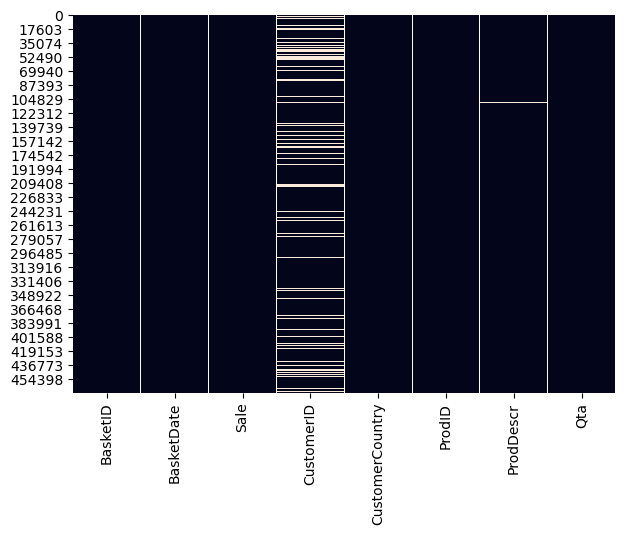

In [9]:
sns.heatmap(df.isnull(), cbar=False)

* ### Statistics of the two numerical attributes (Sale, Qta)

In [10]:
df.describe()

Sale            Qta
count  466678.000000  466678.000000
mean        4.049057      10.806528
std        84.237135     232.627771
min    -11062.060000  -80995.000000
25%         1.250000       2.000000
50%         2.080000       4.000000
75%         3.750000      12.000000
max     38970.000000   80995.000000

# Some preliminary analisys

## General observation
* BasketID:
    * it appears to be a six digit code.
    * it has no null value.
    * is it alwais a six digit code?
    * it has particular combination to indicate some particular values? (ex. 000000 for a null BasketID)
* BasketDate:
    * it indicates the date of the Baskets.
    * BasketDates corresponding to the same BasketsID have the same values.
    * what are the various distributions?
* Sale:
    * indicates the unit price of an item.
    * it has a large (~11000) negative value.
    * it has a large (~38000) positive value.
    * it has no null values.
    * does it have a particular value to indicate a missing value or one with a specific meaning?
    * does the same article have the same price over the years?
* Customer:
    * the customer is a six digit code

## Baskets info
Define a "good BasketID" as a six digit code. Every other BasketID which isn't a six digit code is a "bad BasketID"

In [11]:
def good_bid(val):
    # Returns True is val is a good BasketID (i.e. six digit code), else False
    if len(val) == 6:
        if val.isnumeric():
            return True
    return False

In [12]:
gbid = df[df['BasketID'].apply(good_bid)]
bbid = df[~df['BasketID'].apply(good_bid)]
print('There are', gbid.shape[0], 'records with good BasketID and', bbid.shape[0], 'records with bad BasketID')
print('There are', gbid['BasketID'].nunique(), 'good baskets and', bbid['BasketID'].nunique(), 'bad baskets')

There are 457625 records with good BasketID and 9053 records with bad BasketID
There are 20871 good baskets and 3756 bad baskets


## Product info
Define a "good ProductID" as a five digit code followed by a variable number of characters. Every other ProdID which isn't a five digit code is a "bad ProdID"

In [13]:
def good_pid(val):
    if len(val) >= 5:
        if val[0:5].isnumeric():
            return True
    return False

# ==================================

In [14]:
df[(df['Qta'] < 0) & (df['BasketID'].apply(good_bid))]['ProdDescr'].unique()

<StringArray>
[                                 <NA>,                               'check',
                        'Dotcom sales',          'reverse 21/5/10 adjustment',
                'mouldy, thrown away.',                                   '?',
                        'label mix up',                     'samples/damages',
                         'thrown away',                             'damages',
                            'showroom',                'wrongly sold as sets',
                    'dotcom sold sets',                    'Amazon sold sets',
                   'wrongly sold sets',                      '?sold as sets?',
                     'damages/display',                       'damaged stock',
                            'damages?',                're dotcom quick fix.',
                        'sold in set?',           'POSSIBLE DAMAGES OR LOST?',
                             'damaged',                             'Damaged',
                             'DAMAGED'

### Qta < 0 & good bip => descrizione spazzatura => cancellabile
### Il contrario vale?

# ==================================

In [15]:
gpid = df[df['ProdID'].apply(good_pid)]
bpid = df.loc[~df['ProdID'].apply(good_pid)]
print('There are', gpid.shape[0], 'records with good ProdID and', bpid.shape[0], 'records with bad ProdID')
print('There are', gpid['ProdID'].nunique(), 'good ProdID and', bpid['ProdID'].nunique(), 'bad ProdID')

There are 464268 records with good ProdID and 2410 records with bad ProdID
There are 3924 good ProdID and 29 bad ProdID


In [16]:
for pid, data in bpid.groupby(bpid['ProdID']):
    print('PRODUCT:', pid)
    print('Size:\n\t', data.shape[0], sep='')
    descr_list = data['ProdDescr'].unique()
    print('Description:')
    for i in descr_list:
        print('\t', i, sep='')
    countr_list = data['CustomerCountry'].unique()
    print('Country')
    for i in countr_list:
        print('\t', i, sep='')
    print('Entries with null CustomerID:\n\t', data[data['CustomerID'].isnull()].shape[0], '/', data.shape[0], sep='')
    print('Entries with bad BasketTD:\n\t', data[~data['BasketID'].apply(good_pid)].shape[0], '/', data.shape[0], sep='')
    print('Entries with negative Qta:\n\t', data[data['Qta'] < 0].shape[0], '/', data.shape[0], sep='')
    print('Entries with Sale equal to zero:\n\t', data[data['Sale'] == 0].shape[0], '/', data.shape[0], sep='')
    print('------------------------------')

PRODUCT: AMAZONFEE
Size:
	17
Description:
	AMAZON FEE
Country
	United Kingdom
Entries with null CustomerID:
	17/17
Entries with bad BasketTD:
	16/17
Entries with negative Qta:
	16/17
Entries with Sale equal to zero:
	0/17
------------------------------
PRODUCT: B
Size:
	2
Description:
	Adjust bad debt
Country
	United Kingdom
Entries with null CustomerID:
	2/2
Entries with bad BasketTD:
	2/2
Entries with negative Qta:
	0/2
Entries with Sale equal to zero:
	0/2
------------------------------
PRODUCT: BANK CHARGES
Size:
	25
Description:
	Bank Charges
Country
	United Kingdom
Entries with null CustomerID:
	13/25
Entries with bad BasketTD:
	13/25
Entries with negative Qta:
	13/25
Entries with Sale equal to zero:
	0/25
------------------------------
PRODUCT: C2
Size:
	141
Description:
	CARRIAGE
Country
	EIRE
	United Kingdom
	Channel Islands
	France
Entries with null CustomerID:
	7/141
Entries with bad BasketTD:
	2/141
Entries with negative Qta:
	2/141
Entries with Sale equal to zero:
	0/141
-

In [17]:
bpid.describe()

Sale          Qta
count   2410.000000  2410.000000
mean     185.376935     2.592946
std     1156.593208    63.957176
min   -11062.060000 -1350.000000
25%       15.000000     1.000000
50%       18.000000     1.000000
75%       50.000000     2.000000
max    38970.000000  1600.000000

In [18]:
bpid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 45 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BasketID         2410 non-null   object        
 1   BasketDate       2410 non-null   datetime64[ns]
 2   Sale             2410 non-null   float64       
 3   CustomerID       1916 non-null   object        
 4   CustomerCountry  2410 non-null   string        
 5   ProdID           2410 non-null   object        
 6   ProdDescr        2404 non-null   string        
 7   Qta              2410 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 169.5+ KB


## DateTime properties

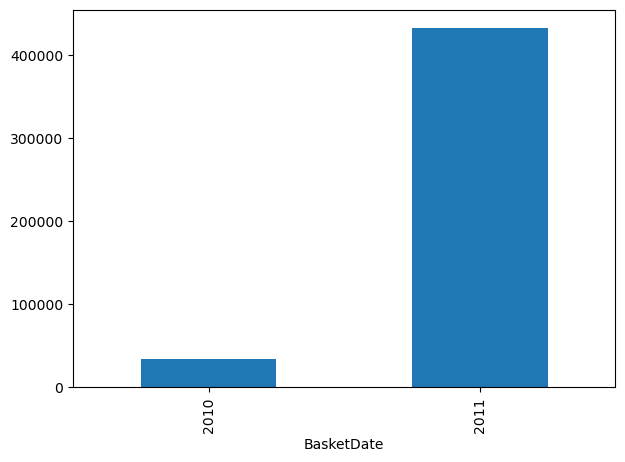

In [19]:
df['BasketDate'].groupby(df['BasketDate'].dt.year).count().plot(kind='bar')

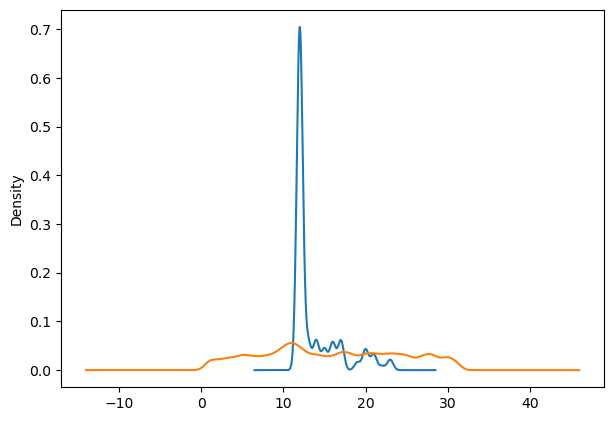

In [20]:
fig, ax = plt.subplots(1, 1)
df[df['BasketDate'].dt.year == 2010]['BasketDate'].dt.day.plot(kind='kde', ax=ax)
df[df['BasketDate'].dt.year == 2011]['BasketDate'].dt.day.plot(kind='kde', ax=ax)

## Observation
* 2010 data aren't enough representative, they are only a small fraction of the dataset and they appear to be only around the 12th of the month
* In contrast 2011's data are more uniformely distributed

# Filtering data
### Filters:
* Delete the rows with bad ProdID - small fraction of the dataset, semply the analisys (what's the meaning of M, S, D, POST, ecc... ?)
* Delete the rows with bad ProdDescr (i.e. Qta < 0 and good BasketID) - their ProductDescriptions are bad, i.e. 'damaged', 'lost', 'correction' ecc...
* Delete the rows with negative Sale (included in the first point)
* Delete null customers - the aim is to define the customer beheaviour meaning that is necessary to uniquely identify a customer, Null customers don't bring enough information
* Delete entries in 2010 - they aren't enought representative

In [21]:
df2 = df[df['ProdID'].apply(good_pid)] # Delete all the rows with bad ProdID
#--------------
to_del = df2[df2['Qta'] < 0] # Select all the rows with negative Qta
to_del = to_del[to_del['BasketID'].apply(good_bid)] # Select all the rows with negative Qta and good BasketID
df2 = df2.drop(index=to_del.index) # Delete all the rows with negative Qta and good BasketID (i.e. ProdDescr is trash)
#--------------
df2 = df2.dropna(subset=['CustomerID']) # Delete all the rows with null CustomerID
df2 = df2[df2['BasketDate'].dt.year == 2011] # Delete all the rows from 2010
df2

BasketID          BasketDate  Sale CustomerID CustomerCountry ProdID  \
34393    539993 2011-04-01 10:00:00  1.95      13313  United Kingdom  22386   
34394    539993 2011-04-01 10:00:00  0.42      13313  United Kingdom  21499   
34395    539993 2011-04-01 10:00:00  0.42      13313  United Kingdom  21498   
34396    539993 2011-04-01 10:00:00  2.10      13313  United Kingdom  22379   
34397    539993 2011-04-01 10:00:00  1.25      13313  United Kingdom  20718   
...         ...                 ...   ...        ...             ...    ...   
471904   581587 2011-09-12 12:50:00  0.85      12680          France  22613   
471905   581587 2011-09-12 12:50:00  2.10      12680          France  22899   
471906   581587 2011-09-12 12:50:00  4.15      12680          France  23254   
471907   581587 2011-09-12 12:50:00  4.15      12680          France  23255   
471908   581587 2011-09-12 12:50:00  4.95      12680          France  22138   

                              ProdDescr  Qta  
34393           JUMBO BAG PINK POLKADOT   10  
34394                BLUE POLKADOT WRAP   25  
34395               RED RETROSPOT WRAP    25  
34396          RECYCLING BAG RETROSPOT     5  
34397         RED RETROSPOT SHOPPER BAG   10  
...                                 ...  ...  
471904      PACK OF 20 SPACEBOY NAPKINS   12  
471905     CHILDREN'S APRON DOLLY GIRL     6  
471906    CHILDRENS CUTLERY DOLLY GIRL     4  
471907  CHILDRENS CUTLERY CIRCUS PARADE    4  
471908    BAKING SET 9 PIECE RETROSPOT     3  

[373451 rows x 8 columns]

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373451 entries, 34393 to 471908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         373451 non-null  object        
 1   BasketDate       373451 non-null  datetime64[ns]
 2   Sale             373451 non-null  float64       
 3   CustomerID       373451 non-null  object        
 4   CustomerCountry  373451 non-null  string        
 5   ProdID           373451 non-null  object        
 6   ProdDescr        373451 non-null  string        
 7   Qta              373451 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 25.6+ MB


### Resulting dataset
* No null CustomerID
* Only good ProdID
* Only good ProdDescr (definire un criterio per una descrizione buona, es: tutta uppercase)
* All the records with engative Qta have a BasketID starting with 'C'
* All the records are from 2011

In [23]:
df2.describe()

Sale            Qta
count  373451.000000  373451.000000
mean        2.892024      12.299284
std         4.374359     258.755314
min         0.000000  -80995.000000
25%         1.250000       2.000000
50%         1.850000       5.000000
75%         3.750000      12.000000
max       649.500000   80995.000000

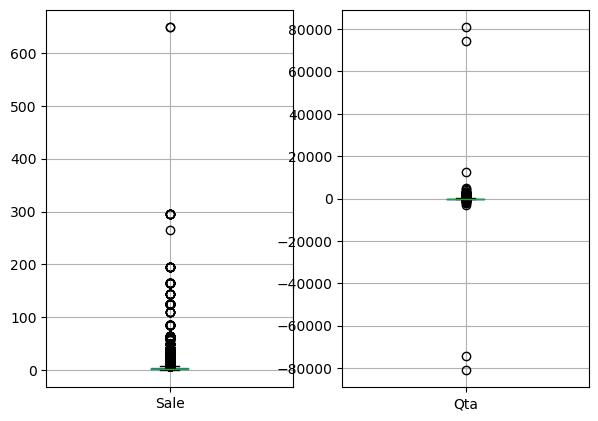

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df2.boxplot(column=['Sale'], ax=ax1)
df2.boxplot(column=['Qta'], ax=ax2)

## Observation
* From the boxplot above it's clear that there are some outliers. Are they errors? Do they have any meaning?
* Regarding the attribute 'Qta' it's clear that for the two greater values there is the negative counterpart.

### Check for high Qta
* In particular there are two high values for Qta, the objectire is to find if those values are legit. (anche quelle negative)

In [25]:
df2.nlargest(2, 'Qta')

BasketID          BasketDate  Sale CustomerID CustomerCountry ProdID  \
470951   581483 2011-09-12 09:15:00  2.08      16446  United Kingdom  23843   
49519    541431 2011-01-18 10:01:00  1.04      12346  United Kingdom  23166   

                             ProdDescr    Qta  
470951     PAPER CRAFT , LITTLE BIRDIE  80995  
49519   MEDIUM CERAMIC TOP STORAGE JAR  74215

In [26]:
df2.nsmallest(2, 'Qta')

BasketID          BasketDate  Sale CustomerID CustomerCountry ProdID  \
470952  C581484 2011-09-12 09:27:00  2.08      16446  United Kingdom  23843   
49524   C541433 2011-01-18 10:17:00  1.04      12346  United Kingdom  23166   

                             ProdDescr    Qta  
470952     PAPER CRAFT , LITTLE BIRDIE -80995  
49524   MEDIUM CERAMIC TOP STORAGE JAR -74215

In [27]:
df2[df2['CustomerID'] == 16446]

BasketID          BasketDate  Sale CustomerID CustomerCountry ProdID  \
164835   553573 2011-05-18 09:52:00  1.65      16446  United Kingdom  22980   
164836   553573 2011-05-18 09:52:00  1.25      16446  United Kingdom  22982   
470951   581483 2011-09-12 09:15:00  2.08      16446  United Kingdom  23843   
470952  C581484 2011-09-12 09:27:00  2.08      16446  United Kingdom  23843   

                          ProdDescr    Qta  
164835       PANTRY SCRUBBING BRUSH      1  
164836          PANTRY PASTRY BRUSH      1  
470951  PAPER CRAFT , LITTLE BIRDIE  80995  
470952  PAPER CRAFT , LITTLE BIRDIE -80995

In [28]:
df2[df2['CustomerID'] == 12346]

BasketID          BasketDate  Sale CustomerID CustomerCountry ProdID  \
49519   541431 2011-01-18 10:01:00  1.04      12346  United Kingdom  23166   
49524  C541433 2011-01-18 10:17:00  1.04      12346  United Kingdom  23166   

                            ProdDescr    Qta  
49519  MEDIUM CERAMIC TOP STORAGE JAR  74215  
49524  MEDIUM CERAMIC TOP STORAGE JAR -74215

## Observation
* Probably errors, delete those for rows

In [29]:
df2.drop(index=df2.nlargest(2, 'Qta').index, inplace=True)

In [30]:
df2.drop(index=df2.nsmallest(2, 'Qta').index, inplace=True)

### Check for high Sale

In [31]:
df2.nlargest(1, 'Sale')

BasketID          BasketDate   Sale CustomerID CustomerCountry ProdID  \
189977   556444 2011-10-06 15:28:00  649.5      15098  United Kingdom  22502   

                             ProdDescr  Qta  
189977  PICNIC BASKET WICKER 60 PIECES   60

## Observation
* Probably legit, keep it

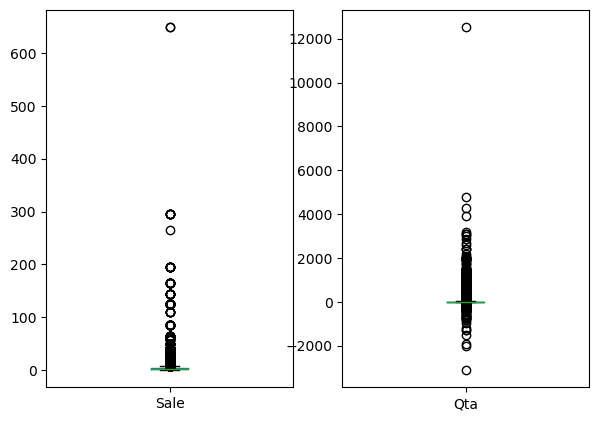

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#df2.boxplot(column=['Sale'].apply(lambda x: np.log10(x) if x > 0 else -np.log10(-x)), ax=ax1)
df2['Sale'].plot.box(ax=ax1)
df2['Qta'].plot.box(ax=ax2)

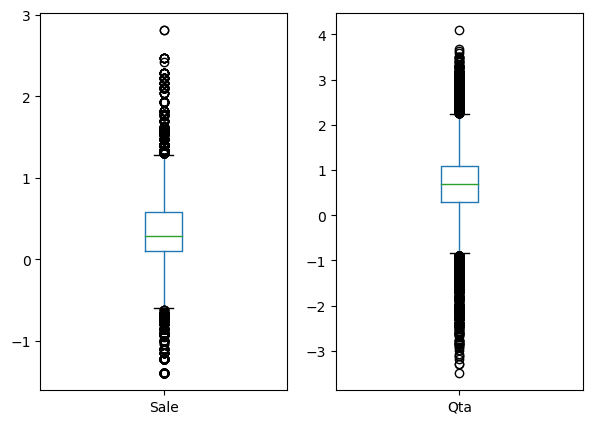

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df2['Sale'].apply(lambda x: np.log10(x) if x > 0 else -np.log10(-x)).plot.box(ax=ax1)
df2['Qta'].apply(lambda x: np.log10(x) if x > 0 else -np.log10(-x)).plot.box(ax=ax2)

## Observation
* Instead of focusing on the actual number of item purchased, we consider only the logarithm since it gives an idea of the order 

# Check for Sale = 0

In [34]:
prods = df2[df2['Sale'] == 0]['ProdID'].unique()
for prod in prods:
    data = df2.loc[df2['ProdID'] == prod, ['Sale', 'Qta']]
    zero_index = data[data['Sale'] == 0].index
    data = data[data['Sale'] != 0]
    if data.shape[0]  == 0:
        continue
    data['Qta'] = data['Qta'].apply(np.abs)
    tot_qta = data['Qta'].apply(np.abs).sum()
    tot_price = data['Sale'].multiply(data['Qta']).sum()
    avg_price = tot_price/tot_qta
    df2.loc[zero_index, 'Sale'] = avg_price

In [35]:
df2['Sale'].describe()

count    373447.000000
mean          2.892288
std           4.374371
min           0.040000
25%           1.250000
50%           1.920000
75%           3.750000
max         649.500000
Name: Sale, dtype: float64

# Define new atributes
* Daytime category
* Total price
* Price category
* Quantity category
* Basket value category
* Drop BasketDate and define the attribute week (????)

In [36]:
df2['DayTime'] = pd.cut(df2['BasketDate'].dt.hour, bins=[6, 9, 12, 15, 18, 21], labels=['Early morning', 'Morning', 'Luch time', 'Evening', 'Late evening'])
df2['TotalPrice'] = df2['Qta'].multiply(df2['Sale'])
df2['Week'] = df2['BasketDate'].dt.week
df2.drop(columns='BasketDate', inplace=True)

In [37]:
df2

BasketID  Sale CustomerID CustomerCountry ProdID  \
34393    539993  1.95      13313  United Kingdom  22386   
34394    539993  0.42      13313  United Kingdom  21499   
34395    539993  0.42      13313  United Kingdom  21498   
34396    539993  2.10      13313  United Kingdom  22379   
34397    539993  1.25      13313  United Kingdom  20718   
...         ...   ...        ...             ...    ...   
471904   581587  0.85      12680          France  22613   
471905   581587  2.10      12680          France  22899   
471906   581587  4.15      12680          France  23254   
471907   581587  4.15      12680          France  23255   
471908   581587  4.95      12680          France  22138   

                              ProdDescr  Qta  DayTime  TotalPrice  Week  
34393           JUMBO BAG PINK POLKADOT   10  Morning       19.50    13  
34394                BLUE POLKADOT WRAP   25  Morning       10.50    13  
34395               RED RETROSPOT WRAP    25  Morning       10.50    13  
34396          RECYCLING BAG RETROSPOT     5  Morning       10.50    13  
34397         RED RETROSPOT SHOPPER BAG   10  Morning       12.50    13  
...                                 ...  ...      ...         ...   ...  
471904      PACK OF 20 SPACEBOY NAPKINS   12  Morning       10.20    37  
471905     CHILDREN'S APRON DOLLY GIRL     6  Morning       12.60    37  
471906    CHILDRENS CUTLERY DOLLY GIRL     4  Morning       16.60    37  
471907  CHILDRENS CUTLERY CIRCUS PARADE    4  Morning       16.60    37  
471908    BAKING SET 9 PIECE RETROSPOT     3  Morning       14.85    37  

[373447 rows x 10 columns]

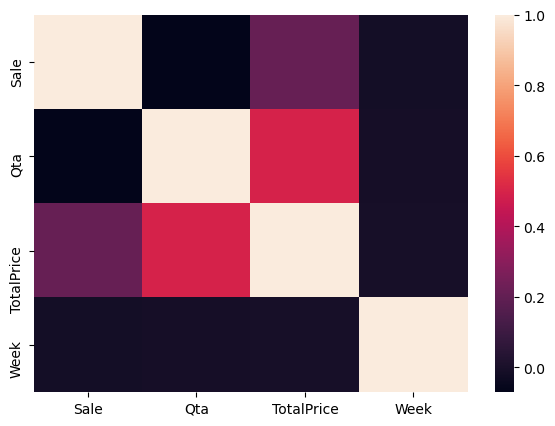

In [38]:
sns.heatmap(df2.corr())

## Observation
* There is no correlation between the week and both Qta and TotalPrice

* ### Distribuzione acquisti nelle settimane

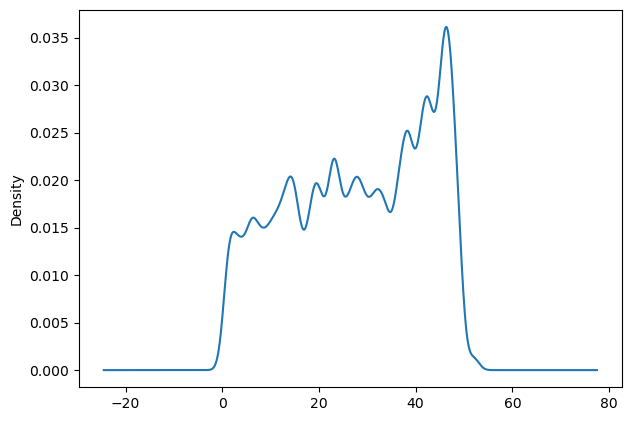

In [39]:
df2['Week'].plot(kind='kde')

# Discretization Qta
* Map quantity into 5 categories:
    * Single (1 items ~0.18 percentile)
    * Small (2:6 items ~0.5 percentile)
    * Medium (6:12 items ~0.8 percentile)
    * High (13:36 items ~95 percentile)
    * Very high (37< items)

In [40]:
df2['QtaLabel'] = pd.cut(df2['Qta'].apply(np.abs), bins=[0, 1, 6, 12, 36, np.inf], labels=['Single', 'Small', 'Medium', 'High', 'Very High'])

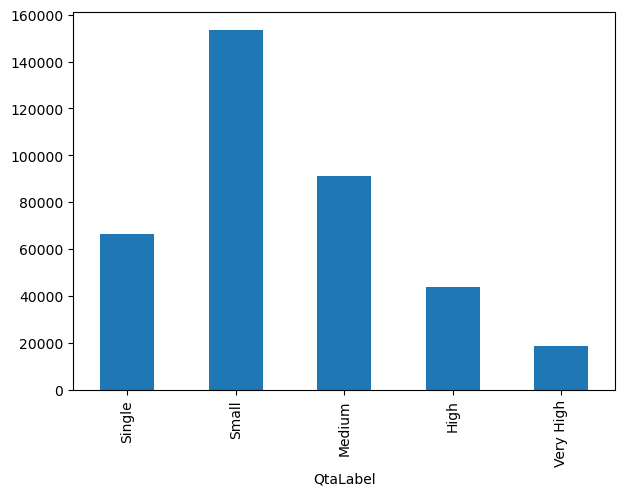

In [41]:
df2['QtaLabel'].groupby(df2['QtaLabel']).count().plot(kind='bar')

# Discretization TotalPrice
* Map into 5 equal frequency categories

In [42]:
df2['TPLabel'] = pd.qcut(df2['TotalPrice'], 5, labels=[1, 2, 3, 4, 5])

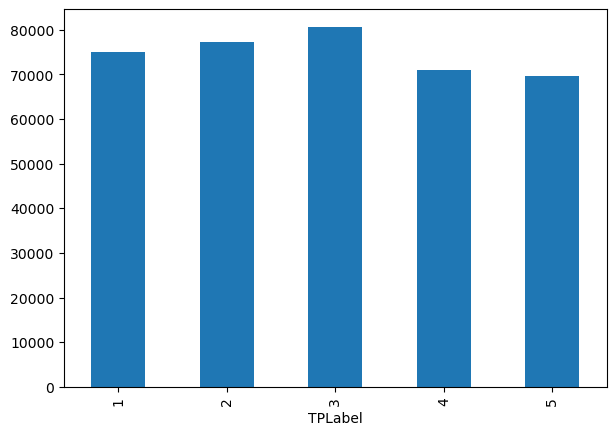

In [43]:
df2['TPLabel'].groupby(df2['TPLabel']).count().plot(kind='bar')

# Obiettivo: tracciare il profilo del cliente
## Che informazioni possono essere utili?
* Informazioni sul cliente
    * Nazionalità
    * Orario della giornata
    * Frequenza giornaliera/settimanale/mensile
    * Quantità media di prodotti che acquista ogni volta
    * Quantità totale di prodotti acquistati
    * Quantità massima di prodotti acquistati
    * Spesa media giornaliera/settimanale/mensile
    * Top-k prodotti per quantità e per importo
    * Frequenza prodotti acquistati
* Informazioni sul prodotto
    * Descrizione
    * Categoria (?)
    * Costo
    * Quantità media acquistata
    * Periodo di massimo acquisto (divisione settimanale?)
* Informazioni sulla data
    * Distribuzione affluenza
* Informazioni sul basket
    * Prodotti comprati insieme
    * Reso (?)
    * Debito (?)

# Extract CustomerID information

### There exist records with null CustomerID. Since we don't know whether those rows correspond to one or more customer, the first approach is to ignore them, considering only non-null ID's.
A future implementation could be to infer the customer's profile of them based on previous analisys.

In [44]:
customers = pd.DataFrame({'CustomerID': df2['CustomerID'].unique()})
customers = customers.astype({'CustomerID': 'object'})

## CustomerID info: extract nationality

### Search general information about the CustomerCountry
* How many countries are there?
* Are there any null value?
* Is there a special value to identify a missing value?

In [45]:
all(df2['CustomerCountry'].notnull()) # Rember that df2 is the dataframe without null customers

True

There are no null values.

In [46]:
print('There are', df2['CustomerCountry'].unique().shape[0], 'distinct value for the customer\'s country.')
dict_countr = {}
for val in df2['CustomerCountry'].unique():
    dict_countr[val] = df2[df2['CustomerCountry'] == val].shape[0]
#for countr, freq in sorted(dict_countr.items(), key=lambda x: x[1], reverse=True): 
 #   print(f'{countr:23}: ', freq, '/', df2.shape[0], sep='')

There are 36 distinct value for the customer's country.


From the previous analisys it's possible to see that most of the rows (with nonnull CustomerID) have a CustomerCountry equal to 'United Kingdom'. Moreover exist values which aren't clear, in particular those values are 'European Community' and 'Unspecified'. While 'Unspecified' clearly indicates that a customer hasn't specified its country in the purchase of an item, the value 'European Community' is ambiguous.

### Are there any customer with multiple nationality?
If so, for every customer with more nationalities, search for the contry with the most number of purchase (baskets) and substitute it with the others.

From the fact that exist special values like 'Undefined' and 'European Community' some particular observation are necessary:
* if a customer is associated with a single country value, assign that value to the customer.
* if a customer have multiple countries associated, assign the the country with the most associated baskets (ATTENTION! not item purchased)
* if a customer have multiple countries associated and one (both) of them is (are) 'Undefined' or (and) 'European Community', then
    * if it has one or more countries different from 'Undefined' or 'European Community', assign the most frequent one
    * if it has only 'Undefined' or 'Eurpean Community' assign 'European Community'

In [47]:
dict_nats = {} # dictionary containing couple id: country 
groups = df2.groupby(df2['CustomerID']) # Group all the rows by CustomerID
for name, group in groups:
    basks = group['BasketID'].groupby(group['CustomerCountry']).unique() # For each customer, group the BasketID w.r.t. the country and count the number of unique values
    if basks.shape[0] > 1:
#PRINT  print('The customer ', str(name), ' made:', sep='')
        countries = basks.index.tolist() # Is this even necessary?
        maxm = 0
        mcountr = ''
        for country in countries:
            #TODO: consider also 'European Community' and 'Undefined'
            # Since the only cases where a customer have multiple nationalities don't include neither 'Unspecifies' and 'Eurpean Community', the code works anyway
            if maxm < basks[country].shape[0]:
                mcountr, maxm = country, basks[country].shape[0]
#PRINT      print('\t', basks[country].shape[0], ' purchase in ', country, sep='')
            # Choose the nationality with the greater number of purchase
#PRINT  print('\tmax: ', maxm, ', country: ', mcountr, sep='')
        countries.remove(mcountr)
#PRINT  print('\tlow countries: ', countries, sep='')
        df2.loc[df2['CustomerID'] == name, 'CustomerCountry'] = mcountr # NOT SURE! Maybe a better way
        dict_nats[name] = mcountr
    else:
        dict_nats[name] = basks.index[0]

In [48]:
customers['Country'] = customers['CustomerID'].map(dict_nats)
customers

CustomerID         Country
0         13313  United Kingdom
1         18097  United Kingdom
2         16656  United Kingdom
3         16875  United Kingdom
4         13094  United Kingdom
...         ...             ...
4226      13436  United Kingdom
4227      15520  United Kingdom
4228      13298  United Kingdom
4229      14569  United Kingdom
4230      12713         Germany

[4231 rows x 2 columns]

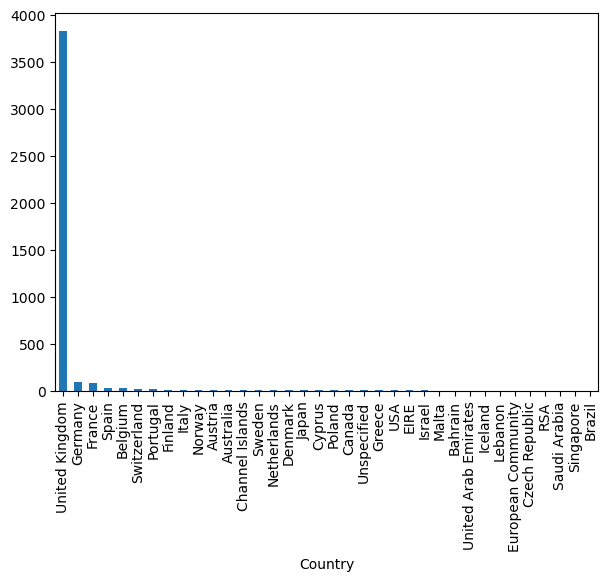

In [49]:
countr_freq = customers['CustomerID'].groupby(customers["Country"]).count().sort_values(ascending=False)
countr_freq.plot(kind='bar')

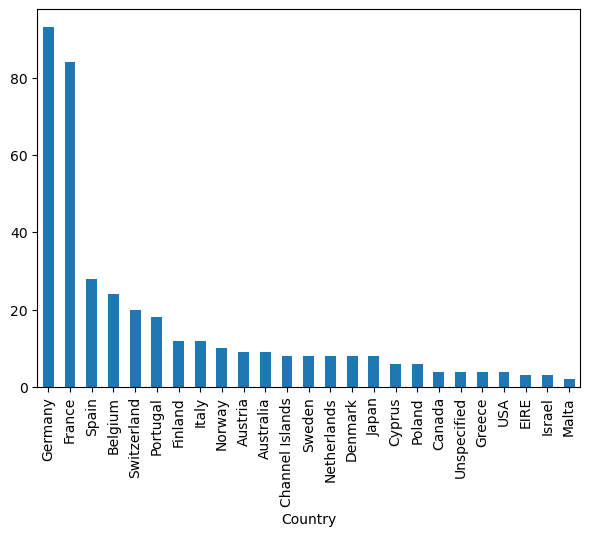

In [50]:
countr_freq['Germany':'Malta'].plot(kind='bar')

## CustomerID info: 
* Extract the number of baskets per customer
* Extract the number of bad baskets per customer
* Extract the number of purchased product
* Extract the number of product bought
* Extract the number of product returned
* Extract the money spent for each customer
* Extract the money refunded

In [51]:
print('There are', df2['BasketID'].unique().shape[0], 'distinct BasketID')
basks = df2.groupby(df2['CustomerID'])['BasketID'].nunique() # Total number of baskets (both good and bad)
bad_basks = df2.groupby(df2[~df2['BasketID'].apply(good_bid)]['CustomerID'])['BasketID'].nunique() # Total number of bad baskets
prods = df2.groupby(df2['CustomerID'])['ProdID'].nunique() # Number of different product bought
qtas = df2.groupby(df2[df2['BasketID'].apply(good_bid)]['CustomerID'])['Qta'].sum() # Total positive Qta
neg_qtas = df2.groupby(df2[~df2['BasketID'].apply(good_bid)]['CustomerID'])['Qta'].sum() # Total negative Qta
spent = df2.groupby(df2[df2['BasketID'].apply(good_bid)]['CustomerID'])['TotalPrice'].sum() # Total money spent
neg_spent = df2.groupby(df2[~df2['BasketID'].apply(good_bid)]['CustomerID'])['TotalPrice'].sum() # Total money refunded

There are 20093 distinct BasketID


In [52]:
customers['NumBaskets'] = customers['CustomerID'].map(basks)
customers['NumBadBasks'] = customers['CustomerID'].map(bad_basks)
customers['NumProd'] = customers['CustomerID'].map(prods)
customers['Qta'] = customers['CustomerID'].map(qtas)
customers['NegQta'] = customers['CustomerID'].map(neg_qtas)
customers['TotSpent'] = customers['CustomerID'].map(spent)
customers['TotNegSpent'] = customers['CustomerID'].map(neg_spent)
customers.fillna(value=0, axis=1, inplace=True)
customers

CustomerID         Country  NumBaskets  NumBadBasks  NumProd     Qta  \
0        13313.0  United Kingdom           5          0.0       47   851.0   
1        18097.0  United Kingdom           6          1.0       65  1406.0   
2        16656.0  United Kingdom          20          6.0       14  8498.0   
3        16875.0  United Kingdom           9          4.0       94  1069.0   
4        13094.0  United Kingdom          15          4.0        4  1524.0   
...          ...             ...         ...          ...      ...     ...   
4226     13436.0  United Kingdom           1          0.0       12    76.0   
4227     15520.0  United Kingdom           1          0.0       18   314.0   
4228     13298.0  United Kingdom           1          0.0        2    96.0   
4229     14569.0  United Kingdom           1          0.0       10    79.0   
4230     12713.0         Germany           1          0.0       37   505.0   

      NegQta  TotSpent  TotNegSpent  
0        0.0   1555.32         0.00  
1       -1.0   2479.88        -4.95  
2      -21.0   8197.04       -57.56  
3      -25.0   2095.53       -72.06  
4     -174.0   1703.64      -218.46  
...      ...       ...          ...  
4226     0.0    196.89         0.00  
4227     0.0    343.50         0.00  
4228     0.0    360.00         0.00  
4229     0.0    227.39         0.00  
4230     0.0    794.55         0.00  

[4231 rows x 9 columns]

In [53]:
bad_customers = customers[customers['Qta'] < customers['NegQta'].apply(np.abs)]
bad_customers

CustomerID         Country  NumBaskets  NumBadBasks  NumProd  Qta  \
37       15973.0  United Kingdom           2          2.0        1  0.0   
111      15823.0  United Kingdom           1          1.0       15  0.0   
471      13693.0  United Kingdom           2          2.0        4  0.0   
784      14627.0  United Kingdom           1          1.0        5  0.0   
965      17850.0  United Kingdom           1          1.0        9  0.0   
970      12967.0  United Kingdom           2          2.0       14  0.0   
988      15638.0  United Kingdom           1          1.0        2  0.0   
989      12943.0  United Kingdom           1          1.0        1  0.0   
1359     12755.0           Japan           2          1.0        4  3.0   
1518     16061.0  United Kingdom           1          1.0        1  0.0   
1981     15363.0  United Kingdom           1          1.0        1  0.0   
2486     17820.0  United Kingdom           1          1.0        2  0.0   
3252     16048.0  United Kingdom           1          1.0        1  0.0   
3299     16428.0  United Kingdom           1          1.0        1  0.0   
3717     15728.0  United Kingdom           1          1.0        4  0.0   
3736     16742.0  United Kingdom           1          1.0        3  0.0   
4201     14777.0  United Kingdom           1          1.0        1  0.0   
4223     12785.0        Portugal           1          1.0        1  0.0   

      NegQta  TotSpent  TotNegSpent  
37     -19.0      0.00      -208.05  
111   -282.0      0.00      -811.86  
471     -6.0      0.00       -32.00  
784     -5.0      0.00       -21.85  
965    -37.0      0.00       -87.73  
970   -195.0      0.00      -466.15  
988    -52.0      0.00       -94.00  
989     -1.0      0.00        -3.75  
1359  -624.0     17.55     -1591.20  
1518    -1.0      0.00       -29.95  
1981    -1.0      0.00        -7.95  
2486    -2.0      0.00        -7.10  
3252    -1.0      0.00       -12.75  
3299    -1.0      0.00        -2.95  
3717   -34.0      0.00      -134.80  
3736  -190.0      0.00      -464.90  
4201    -1.0      0.00        -2.95  
4223    -3.0      0.00        -6.24

### Delete those customers, because returned more quantity than they bought

In [54]:
customers.drop(index=bad_customers.index, inplace=True)

In [55]:
customers['ActualQta'] = customers['Qta'].add(customers['NegQta'])
customers['ActualSpent'] = customers['TotSpent'].add(customers['TotNegSpent'])

In [56]:
print(customers['ActualQta'].describe())
print(customers['ActualSpent'].describe())

count      4213.000000
mean       1090.584382
std        4536.115027
min           0.000000
25%         155.000000
50%         367.000000
75%         950.000000
max      190419.000000
Name: ActualQta, dtype: float64
count    4.213000e+03
mean     1.834400e+03
std      7.961326e+03
min     -6.821210e-13
25%      2.944000e+02
50%      6.408300e+02
75%      1.552870e+03
max      2.709332e+05
Name: ActualSpent, dtype: float64


In [57]:
customers[customers['ActualQta'] == 0]

CustomerID         Country  NumBaskets  NumBadBasks  NumProd     Qta  \
248      13672.0  United Kingdom           5          3.0        4    57.0   
2089     17548.0  United Kingdom           2          1.0        5    58.0   
2116     16163.0  United Kingdom           2          1.0        1   100.0   
2194     13762.0  United Kingdom           2          1.0        7   272.0   
2927     18268.0  United Kingdom           2          1.0        1     2.0   
3267     14557.0  United Kingdom           2          1.0       16   510.0   
3277     16878.0  United Kingdom           2          1.0        3    12.0   
3438     13364.0  United Kingdom           2          1.0       10    71.0   
3525     14792.0  United Kingdom           2          1.0        2     2.0   
3581     12607.0             USA           2          1.0      101  1228.0   
3628     12454.0           Spain           2          1.0       15  1006.0   
3946     18274.0  United Kingdom           2          1.0       11    88.0   
4187     12558.0             USA           2          1.0       11   196.0   

      NegQta  TotSpent  TotNegSpent  ActualQta   ActualSpent  
248    -57.0    186.39      -186.39        0.0  0.000000e+00  
2089   -58.0    103.30      -103.30        0.0  0.000000e+00  
2116  -100.0    415.00      -415.00        0.0  0.000000e+00  
2194  -272.0    306.72      -306.72        0.0  5.684342e-14  
2927    -2.0     25.50       -25.50        0.0  0.000000e+00  
3267  -510.0    788.38      -788.38        0.0  0.000000e+00  
3277   -12.0     13.30       -13.30        0.0  0.000000e+00  
3438   -71.0    134.96      -134.96        0.0  0.000000e+00  
3525    -2.0      6.20        -6.20        0.0  0.000000e+00  
3581 -1228.0   1579.51     -1579.51        0.0 -6.821210e-13  
3628 -1006.0   3528.34     -3528.34        0.0  4.547474e-13  
3946   -88.0    175.92      -175.92        0.0  0.000000e+00  
4187  -196.0    269.96      -269.96        0.0  0.000000e+00

### Remove all the customers with ActuaQta equal to zero since they hand't bought anything

In [58]:
customers = customers[customers['ActualQta'] > 0]

In [59]:
customers['ActualQta'].describe()

count      4200.000000
mean       1093.960000
std        4542.724921
min           1.000000
25%         156.000000
50%         369.000000
75%         950.000000
max      190419.000000
Name: ActualQta, dtype: float64

In [60]:
customers['ActualSpent'].describe()

count      4200.000000
mean       1840.077882
std        7972.985576
min           2.900000
25%         297.602500
50%         643.695000
75%        1554.690000
max      270933.223060
Name: ActualSpent, dtype: float64

In [61]:
customers['AvgPrice'] = customers['ActualSpent'].divide(customers['ActualQta'])
customers

<ipython-input-61-a1187523fe96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['AvgPrice'] = customers['ActualSpent'].divide(customers['ActualQta'])


CustomerID         Country  NumBaskets  NumBadBasks  NumProd     Qta  \
0        13313.0  United Kingdom           5          0.0       47   851.0   
1        18097.0  United Kingdom           6          1.0       65  1406.0   
2        16656.0  United Kingdom          20          6.0       14  8498.0   
3        16875.0  United Kingdom           9          4.0       94  1069.0   
4        13094.0  United Kingdom          15          4.0        4  1524.0   
...          ...             ...         ...          ...      ...     ...   
4226     13436.0  United Kingdom           1          0.0       12    76.0   
4227     15520.0  United Kingdom           1          0.0       18   314.0   
4228     13298.0  United Kingdom           1          0.0        2    96.0   
4229     14569.0  United Kingdom           1          0.0       10    79.0   
4230     12713.0         Germany           1          0.0       37   505.0   

      NegQta  TotSpent  TotNegSpent  ActualQta  ActualSpent  AvgPrice  
0        0.0   1555.32         0.00      851.0      1555.32  1.827638  
1       -1.0   2479.88        -4.95     1405.0      2474.93  1.761516  
2      -21.0   8197.04       -57.56     8477.0      8139.48  0.960184  
3      -25.0   2095.53       -72.06     1044.0      2023.47  1.938190  
4     -174.0   1703.64      -218.46     1350.0      1485.18  1.100133  
...      ...       ...          ...        ...          ...       ...  
4226     0.0    196.89         0.00       76.0       196.89  2.590658  
4227     0.0    343.50         0.00      314.0       343.50  1.093949  
4228     0.0    360.00         0.00       96.0       360.00  3.750000  
4229     0.0    227.39         0.00       79.0       227.39  2.878354  
4230     0.0    794.55         0.00      505.0       794.55  1.573366  

[4200 rows x 12 columns]

In [62]:
customers['AvgBasksValue'] = customers['ActualSpent'].divide(customers['NumBaskets'].subtract(customers['NumBadBasks']))
customers

<ipython-input-62-d034d0caff33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['AvgBasksValue'] = customers['ActualSpent'].divide(customers['NumBaskets'].subtract(customers['NumBadBasks']))


CustomerID         Country  NumBaskets  NumBadBasks  NumProd     Qta  \
0        13313.0  United Kingdom           5          0.0       47   851.0   
1        18097.0  United Kingdom           6          1.0       65  1406.0   
2        16656.0  United Kingdom          20          6.0       14  8498.0   
3        16875.0  United Kingdom           9          4.0       94  1069.0   
4        13094.0  United Kingdom          15          4.0        4  1524.0   
...          ...             ...         ...          ...      ...     ...   
4226     13436.0  United Kingdom           1          0.0       12    76.0   
4227     15520.0  United Kingdom           1          0.0       18   314.0   
4228     13298.0  United Kingdom           1          0.0        2    96.0   
4229     14569.0  United Kingdom           1          0.0       10    79.0   
4230     12713.0         Germany           1          0.0       37   505.0   

      NegQta  TotSpent  TotNegSpent  ActualQta  ActualSpent  AvgPrice  \
0        0.0   1555.32         0.00      851.0      1555.32  1.827638   
1       -1.0   2479.88        -4.95     1405.0      2474.93  1.761516   
2      -21.0   8197.04       -57.56     8477.0      8139.48  0.960184   
3      -25.0   2095.53       -72.06     1044.0      2023.47  1.938190   
4     -174.0   1703.64      -218.46     1350.0      1485.18  1.100133   
...      ...       ...          ...        ...          ...       ...   
4226     0.0    196.89         0.00       76.0       196.89  2.590658   
4227     0.0    343.50         0.00      314.0       343.50  1.093949   
4228     0.0    360.00         0.00       96.0       360.00  3.750000   
4229     0.0    227.39         0.00       79.0       227.39  2.878354   
4230     0.0    794.55         0.00      505.0       794.55  1.573366   

      AvgBasksValue  
0        311.064000  
1        494.986000  
2        581.391429  
3        404.694000  
4        135.016364  
...             ...  
4226     196.890000  
4227     343.500000  
4228     360.000000  
4229     227.390000  
4230     794.550000  

[4200 rows x 13 columns]

# Compute the entropy
* Quantity entropy
* Total price entropy
### Come si fa?
Sia $\text{X}$ una variabile aleatore discreate che prende valori in $\{x_1, \ldots, x_n\}$ e sia $p(x_i) = \text{Pr}(\text{X} = x_i)$, allora la *Shannon entropy* di $\text{X}$ è data da:
$$H(X) = \sum_{i=1}^n{p(x_i)log_2(\frac{1}{p(x_i)})} = -\sum_{i=1}^n{p(x_i)log_2(p(x_i))}$$
e se $p(x_i) = 0$ allora $-p(x_i)log_2(x_i) = 0$.
Per cui, se ho un Customer e voglio calcolarmi la sua Shannon entropy, ad esempio riferita alla variabilità delle quantità, prendo l'attributo QtaLabel e mi calcolo le relative frequenze, ottenendo p ... ecc

In [63]:
entropy = {}
for cust, data in df2['QtaLabel'].groupby(df2['CustomerID']):
    entropy[cust] = 0
    tot = data.count()
    #print(cust)
    #print(tot)
    for label, count in data.value_counts().iteritems():
        if count == 0:
            continue
        p = count/tot
        entropy[cust] += -p*np.log2(p)
        #print('\t', f'{label:10}', f'{count:3}', '  ', '%.3f' %p, '%.3f' %entropy[cust], sep='')
    #print('Entropy: ', entropy[cust])
    
customers['QtaEntr'] = customers['CustomerID'].map(entropy)

<ipython-input-63-b7345adcaee8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['QtaEntr'] = customers['CustomerID'].map(entropy)


In [64]:
entropy = {}
for cust, data in df2['TPLabel'].groupby(df2['CustomerID']):
    entropy[cust] = 0
    tot = data.count()
    #print(cust)
    #print(tot)
    for label, count in data.value_counts().iteritems():
        if count == 0:
            continue
        p = count/tot
        entropy[cust] += -p*np.log2(p)
        #print('\t', f'{label:10}', f'{count:3}', '  ', '%.3f' %p, '%.3f' %entropy[cust], sep='')
    #print('Entropy: ', entropy[cust])
    
customers['TPEntr'] = customers['CustomerID'].map(entropy)

<ipython-input-64-574c21a5716e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['TPEntr'] = customers['CustomerID'].map(entropy)


In [65]:
customers

CustomerID         Country  NumBaskets  NumBadBasks  NumProd     Qta  \
0        13313.0  United Kingdom           5          0.0       47   851.0   
1        18097.0  United Kingdom           6          1.0       65  1406.0   
2        16656.0  United Kingdom          20          6.0       14  8498.0   
3        16875.0  United Kingdom           9          4.0       94  1069.0   
4        13094.0  United Kingdom          15          4.0        4  1524.0   
...          ...             ...         ...          ...      ...     ...   
4226     13436.0  United Kingdom           1          0.0       12    76.0   
4227     15520.0  United Kingdom           1          0.0       18   314.0   
4228     13298.0  United Kingdom           1          0.0        2    96.0   
4229     14569.0  United Kingdom           1          0.0       10    79.0   
4230     12713.0         Germany           1          0.0       37   505.0   

      NegQta  TotSpent  TotNegSpent  ActualQta  ActualSpent  AvgPrice  \
0        0.0   1555.32         0.00      851.0      1555.32  1.827638   
1       -1.0   2479.88        -4.95     1405.0      2474.93  1.761516   
2      -21.0   8197.04       -57.56     8477.0      8139.48  0.960184   
3      -25.0   2095.53       -72.06     1044.0      2023.47  1.938190   
4     -174.0   1703.64      -218.46     1350.0      1485.18  1.100133   
...      ...       ...          ...        ...          ...       ...   
4226     0.0    196.89         0.00       76.0       196.89  2.590658   
4227     0.0    343.50         0.00      314.0       343.50  1.093949   
4228     0.0    360.00         0.00       96.0       360.00  3.750000   
4229     0.0    227.39         0.00       79.0       227.39  2.878354   
4230     0.0    794.55         0.00      505.0       794.55  1.573366   

      AvgBasksValue   QtaEntr    TPEntr  
0        311.064000  1.357501  1.511034  
1        494.986000  1.804576  1.710616  
2        581.391429  1.784300  0.902926  
3        404.694000  1.659600  1.996238  
4        135.016364  0.986427  0.764205  
...             ...       ...       ...  
4226     196.890000  1.418296  1.483356  
4227     343.500000  0.614369  1.392147  
4228     360.000000  1.000000  0.000000  
4229     227.390000  1.625815  1.792481  
4230     794.550000  1.248145  1.828983  

[4200 rows x 15 columns]

# CUSTOMER2

In [66]:
customers2 = customers.loc[:, ['CustomerID', 'ActualQta', 'ActualSpent', 'AvgPrice', 'AvgBasksValue', 'QtaEntr', 'TPEntr']]
customers2['YearFreq'] = (customers['NumBaskets'].subtract(customers['NumBadBasks'])).divide(12)
customers2

CustomerID  ActualQta  ActualSpent  AvgPrice  AvgBasksValue   QtaEntr  \
0        13313.0      851.0      1555.32  1.827638     311.064000  1.357501   
1        18097.0     1405.0      2474.93  1.761516     494.986000  1.804576   
2        16656.0     8477.0      8139.48  0.960184     581.391429  1.784300   
3        16875.0     1044.0      2023.47  1.938190     404.694000  1.659600   
4        13094.0     1350.0      1485.18  1.100133     135.016364  0.986427   
...          ...        ...          ...       ...            ...       ...   
4226     13436.0       76.0       196.89  2.590658     196.890000  1.418296   
4227     15520.0      314.0       343.50  1.093949     343.500000  0.614369   
4228     13298.0       96.0       360.00  3.750000     360.000000  1.000000   
4229     14569.0       79.0       227.39  2.878354     227.390000  1.625815   
4230     12713.0      505.0       794.55  1.573366     794.550000  1.248145   

        TPEntr  YearFreq  
0     1.511034  0.416667  
1     1.710616  0.416667  
2     0.902926  1.166667  
3     1.996238  0.416667  
4     0.764205  0.916667  
...        ...       ...  
4226  1.483356  0.083333  
4227  1.392147  0.083333  
4228  0.000000  0.083333  
4229  1.792481  0.083333  
4230  1.828983  0.083333  

[4200 rows x 8 columns]

In [67]:
customers2.describe()

CustomerID      ActualQta    ActualSpent     AvgPrice  AvgBasksValue  \
count   4200.000000    4200.000000    4200.000000  4200.000000    4200.000000   
mean   15291.372857    1093.960000    1840.077882     2.368642     374.524257   
std     1718.263821    4542.724921    7972.985576    11.538503     475.449710   
min    12347.000000       1.000000       2.900000     0.085619       2.900000   
25%    13810.750000     156.000000     297.602500     1.371241     173.897500   
50%    15283.500000     369.000000     643.695000     1.766695     287.463333   
75%    16770.250000     950.000000    1554.690000     2.294709     426.063750   
max    18287.000000  190419.000000  270933.223060   649.500000   13206.500000   

           QtaEntr       TPEntr     YearFreq  
count  4200.000000  4200.000000  4200.000000  
mean      1.410580     1.565349     0.337183  
std       0.446898     0.500904     0.587689  
min       0.000000     0.000000     0.083333  
25%       1.218114     1.393811     0.083333  
50%       1.487319     1.668362     0.166667  
75%       1.707233     1.900905     0.333333  
max       2.287738     2.310700    15.416667

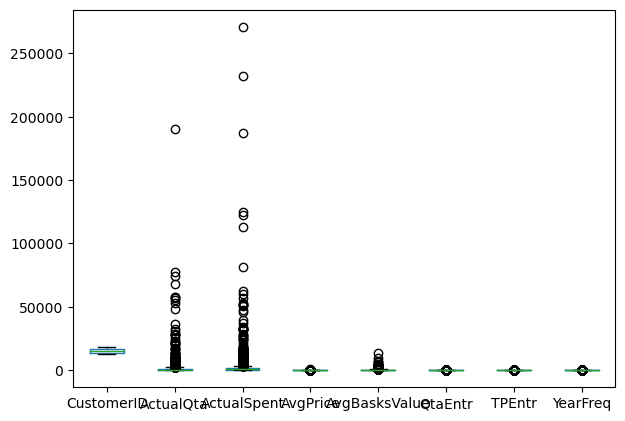

In [68]:
customers2.plot.box()

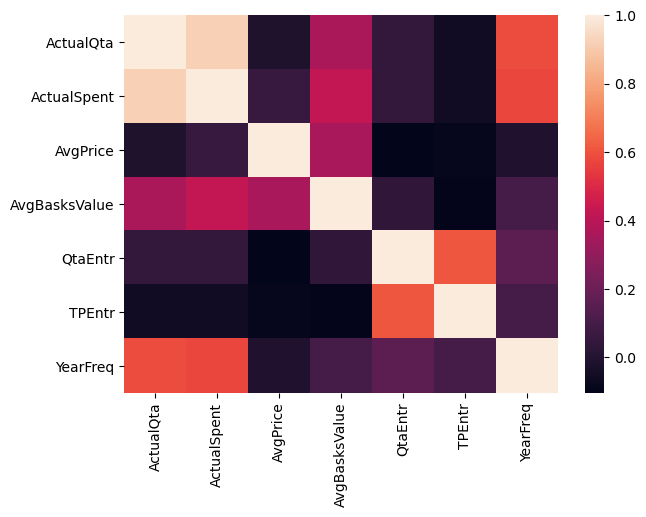

In [69]:
sns.heatmap(customers2.loc[:, 'ActualQta':].corr())

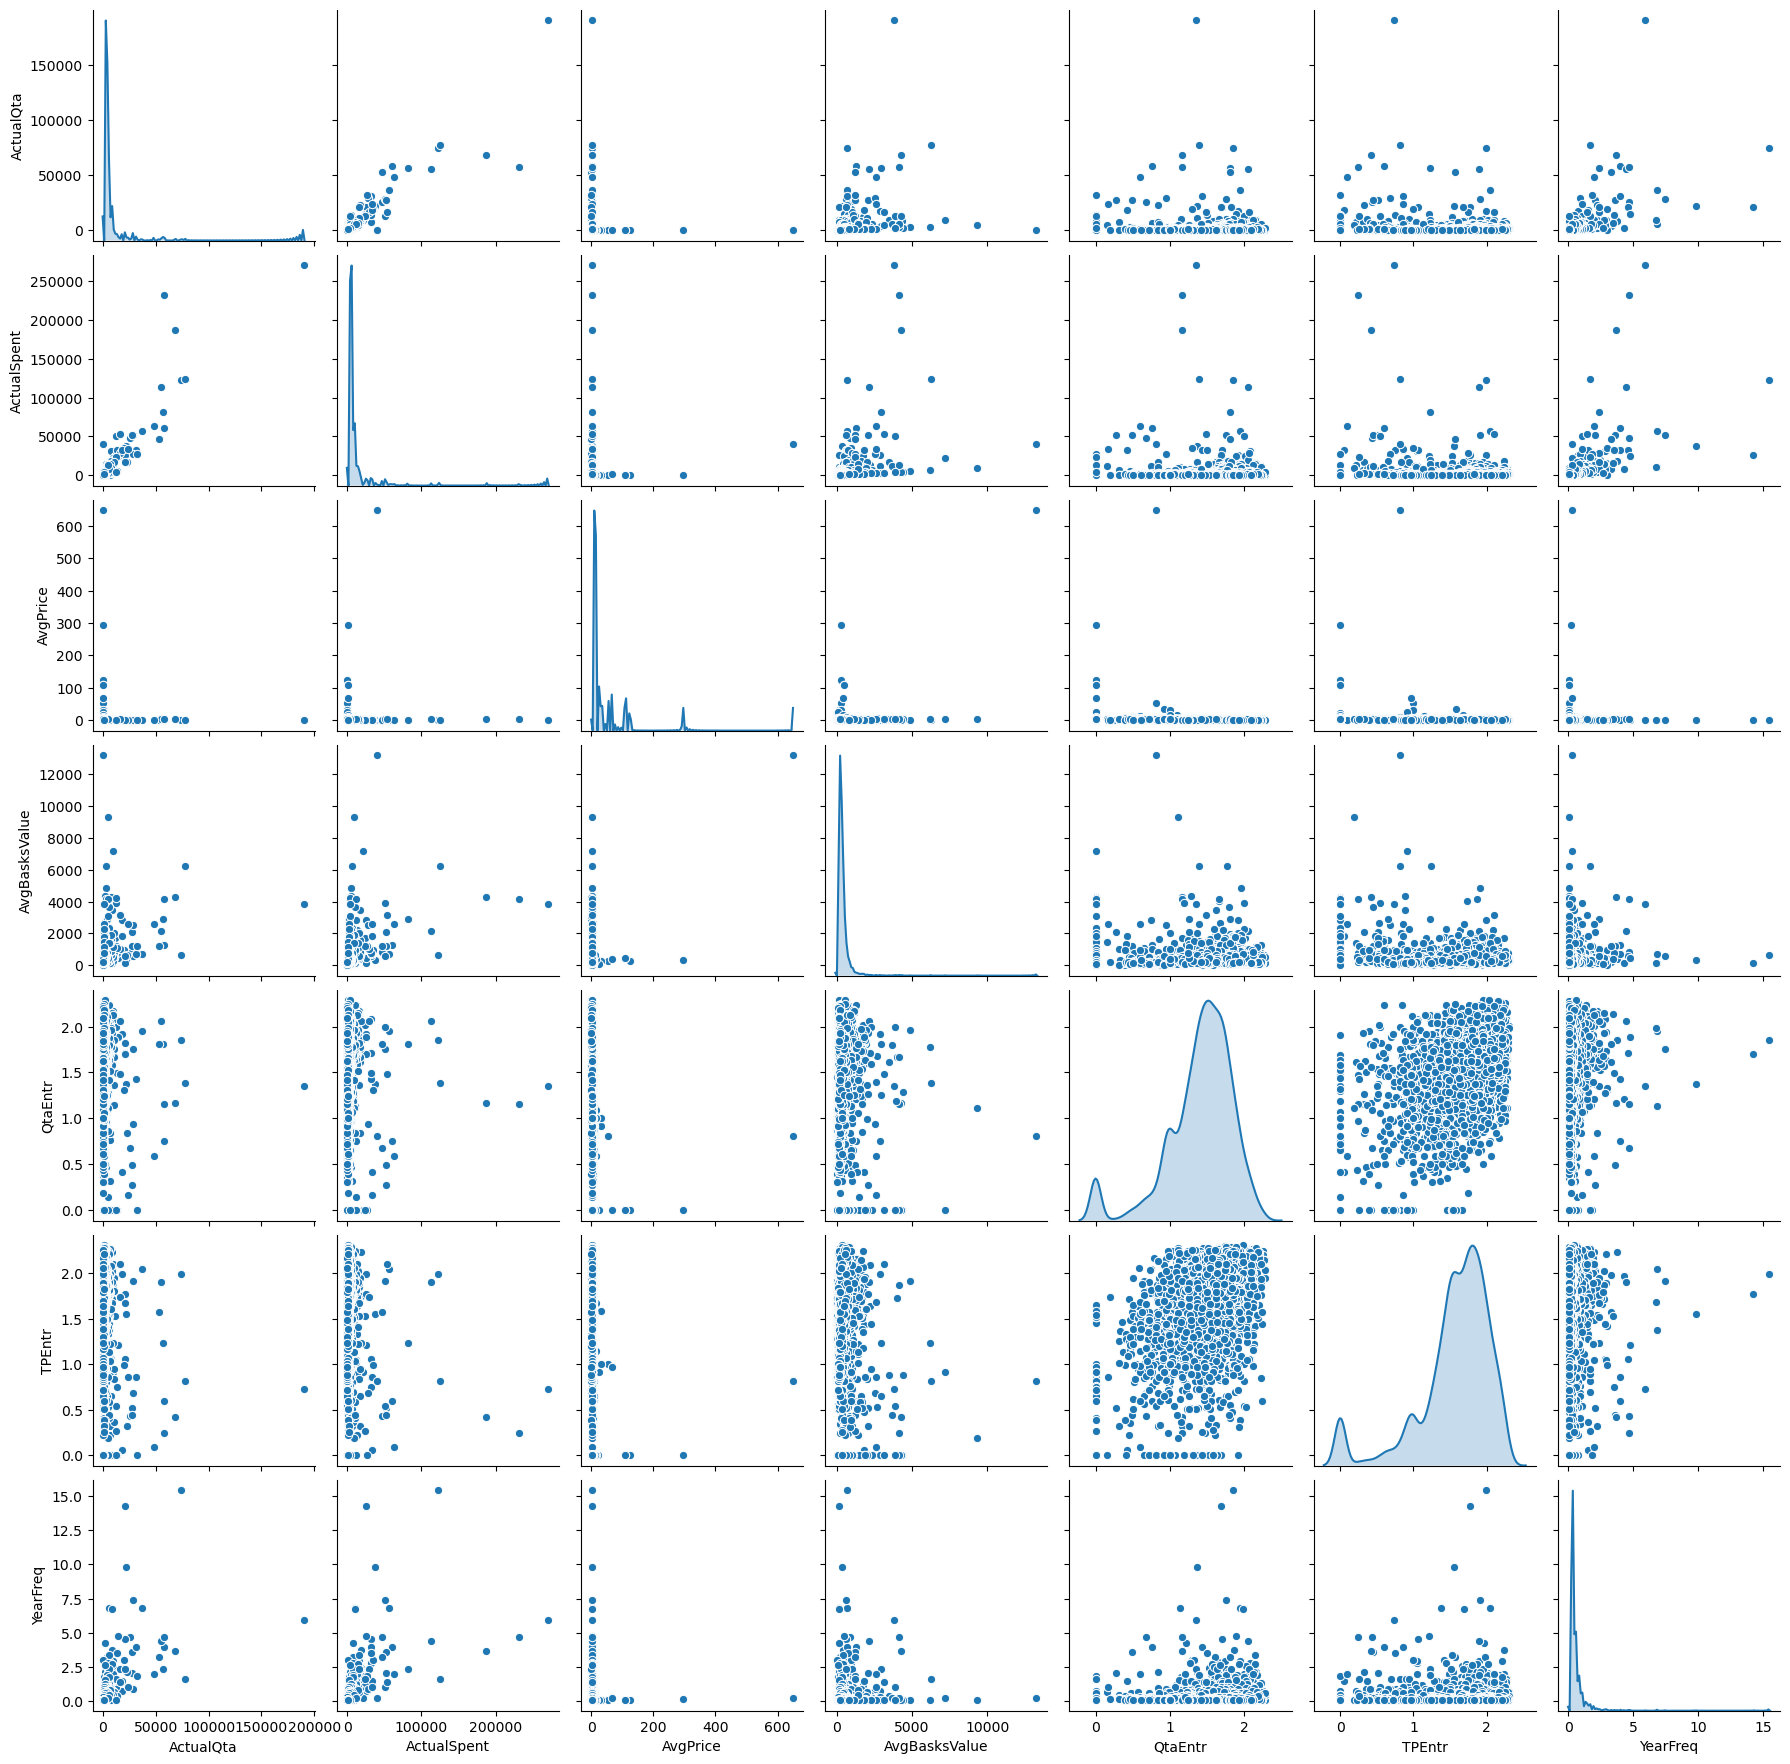

In [70]:
sns.pairplot(customers2.loc[:, 'ActualQta':], diag_kind='kde')

# Observation
* ActualQta and ActualSpent are really spread, consider the logarithm in base 10, in this way the difference between high number has a different weight

In [71]:
customers2['logQta'] = customers2['ActualQta'].apply(np.log10)
customers2['logSpent'] = customers2['ActualSpent'].apply(np.log10)
customers2.drop(columns=['ActualQta', 'ActualSpent'], inplace=True)
customers2

CustomerID  AvgPrice  AvgBasksValue   QtaEntr    TPEntr  YearFreq  \
0        13313.0  1.827638     311.064000  1.357501  1.511034  0.416667   
1        18097.0  1.761516     494.986000  1.804576  1.710616  0.416667   
2        16656.0  0.960184     581.391429  1.784300  0.902926  1.166667   
3        16875.0  1.938190     404.694000  1.659600  1.996238  0.416667   
4        13094.0  1.100133     135.016364  0.986427  0.764205  0.916667   
...          ...       ...            ...       ...       ...       ...   
4226     13436.0  2.590658     196.890000  1.418296  1.483356  0.083333   
4227     15520.0  1.093949     343.500000  0.614369  1.392147  0.083333   
4228     13298.0  3.750000     360.000000  1.000000  0.000000  0.083333   
4229     14569.0  2.878354     227.390000  1.625815  1.792481  0.083333   
4230     12713.0  1.573366     794.550000  1.248145  1.828983  0.083333   

        logQta  logSpent  
0     2.929930  3.191820  
1     3.147676  3.393563  
2     3.928242  3.910597  
3     3.018700  3.306097  
4     3.130334  3.171779  
...        ...       ...  
4226  1.880814  2.294224  
4227  2.496930  2.535927  
4228  1.982271  2.556303  
4229  1.897627  2.356771  
4230  2.703291  2.900121  

[4200 rows x 8 columns]

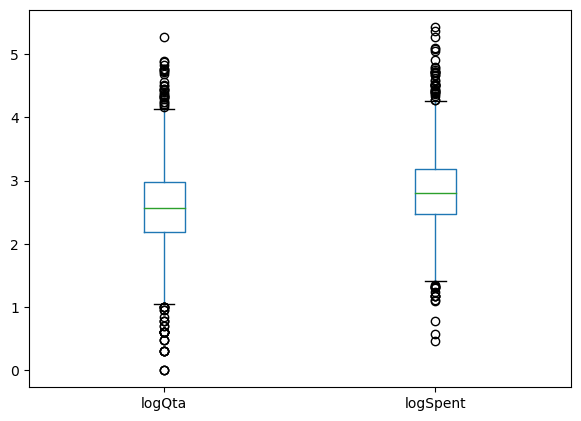

In [72]:
customers2.loc[:, 'logQta':].plot.box()

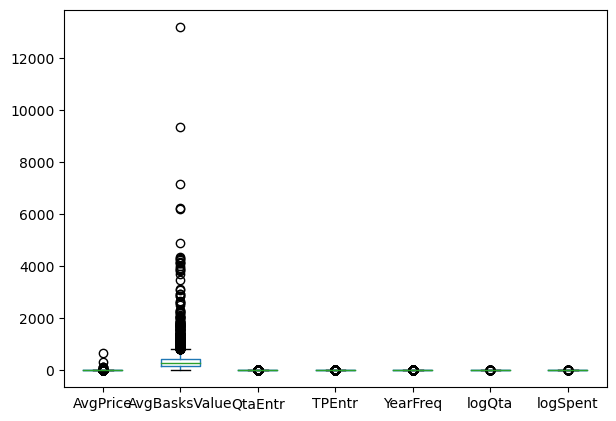

In [73]:
customers2.loc[:, 'AvgPrice':].plot.box()

In [74]:
customers2['logAvgPrice'] = customers2['AvgPrice'].apply(np.log10)
customers2['logAvgBasksValue'] = customers2['AvgBasksValue'].apply(np.log10)
customers2.drop(columns=['AvgPrice', 'AvgBasksValue'], inplace=True)
customers2

CustomerID   QtaEntr    TPEntr  YearFreq    logQta  logSpent  \
0        13313.0  1.357501  1.511034  0.416667  2.929930  3.191820   
1        18097.0  1.804576  1.710616  0.416667  3.147676  3.393563   
2        16656.0  1.784300  0.902926  1.166667  3.928242  3.910597   
3        16875.0  1.659600  1.996238  0.416667  3.018700  3.306097   
4        13094.0  0.986427  0.764205  0.916667  3.130334  3.171779   
...          ...       ...       ...       ...       ...       ...   
4226     13436.0  1.418296  1.483356  0.083333  1.880814  2.294224   
4227     15520.0  0.614369  1.392147  0.083333  2.496930  2.535927   
4228     13298.0  1.000000  0.000000  0.083333  1.982271  2.556303   
4229     14569.0  1.625815  1.792481  0.083333  1.897627  2.356771   
4230     12713.0  1.248145  1.828983  0.083333  2.703291  2.900121   

      logAvgPrice  logAvgBasksValue  
0        0.261890          2.492850  
1        0.245887          2.694593  
2       -0.017646          2.764469  
3        0.287396          2.607127  
4        0.041445          2.130386  
...           ...               ...  
4226     0.413410          2.294224  
4227     0.038997          2.535927  
4228     0.574031          2.556303  
4229     0.459144          2.356771  
4230     0.196830          2.900121  

[4200 rows x 8 columns]

In [75]:
customers2.loc[:, 'QtaEntr':].describe()

QtaEntr       TPEntr     YearFreq       logQta     logSpent  \
count  4200.000000  4200.000000  4200.000000  4200.000000  4200.000000   
mean      1.410580     1.565349     0.337183     2.582124     2.835837   
std       0.446898     0.500904     0.587689     0.591237     0.539909   
min       0.000000     0.000000     0.083333     0.000000     0.462398   
25%       1.218114     1.393811     0.083333     2.193125     2.473636   
50%       1.487319     1.668362     0.166667     2.567026     2.808680   
75%       1.707233     1.900905     0.333333     2.977724     3.191644   
max       2.287738     2.310700    15.416667     5.279710     5.432862   

       logAvgPrice  logAvgBasksValue  
count  4200.000000       4200.000000  
mean      0.253713          2.440323  
std       0.228015          0.325254  
min      -1.067429          0.462398  
25%       0.137114          2.240293  
50%       0.247162          2.458582  
75%       0.360727          2.629475  
max       2.812579          4.120788

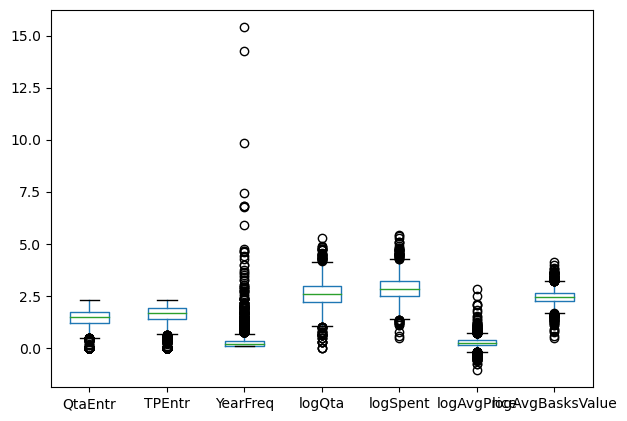

In [76]:
customers2.loc[:, 'QtaEntr':].plot.box()

In [77]:
customers2.loc[:, 'QtaEntr':].corr()

QtaEntr    TPEntr  YearFreq    logQta  logSpent  \
QtaEntr           1.000000  0.608464  0.160411  0.456354  0.380273   
TPEntr            0.608464  1.000000  0.095633  0.289092  0.252464   
YearFreq          0.160411  0.095633  1.000000  0.528334  0.572511   
logQta            0.456354  0.289092  0.528334  1.000000  0.922691   
logSpent          0.380273  0.252464  0.572511  0.922691  1.000000   
logAvgPrice      -0.282877 -0.151806 -0.014325 -0.408163 -0.024645   
logAvgBasksValue  0.259946  0.116073  0.122338  0.652773  0.713473   

                  logAvgPrice  logAvgBasksValue  
QtaEntr             -0.282877          0.259946  
TPEntr              -0.151806          0.116073  
YearFreq            -0.014325          0.122338  
logQta              -0.408163          0.652773  
logSpent            -0.024645          0.713473  
logAvgPrice          1.000000         -0.003211  
logAvgBasksValue    -0.003211          1.000000

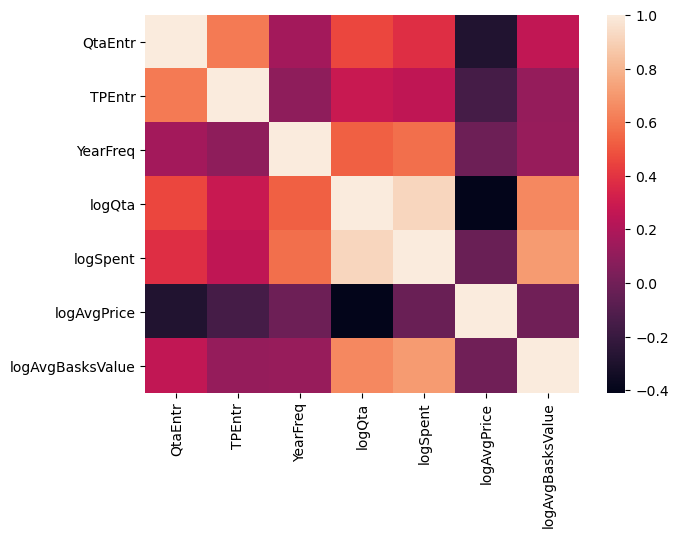

In [78]:
sns.heatmap(customers2.loc[:, 'QtaEntr':].corr())

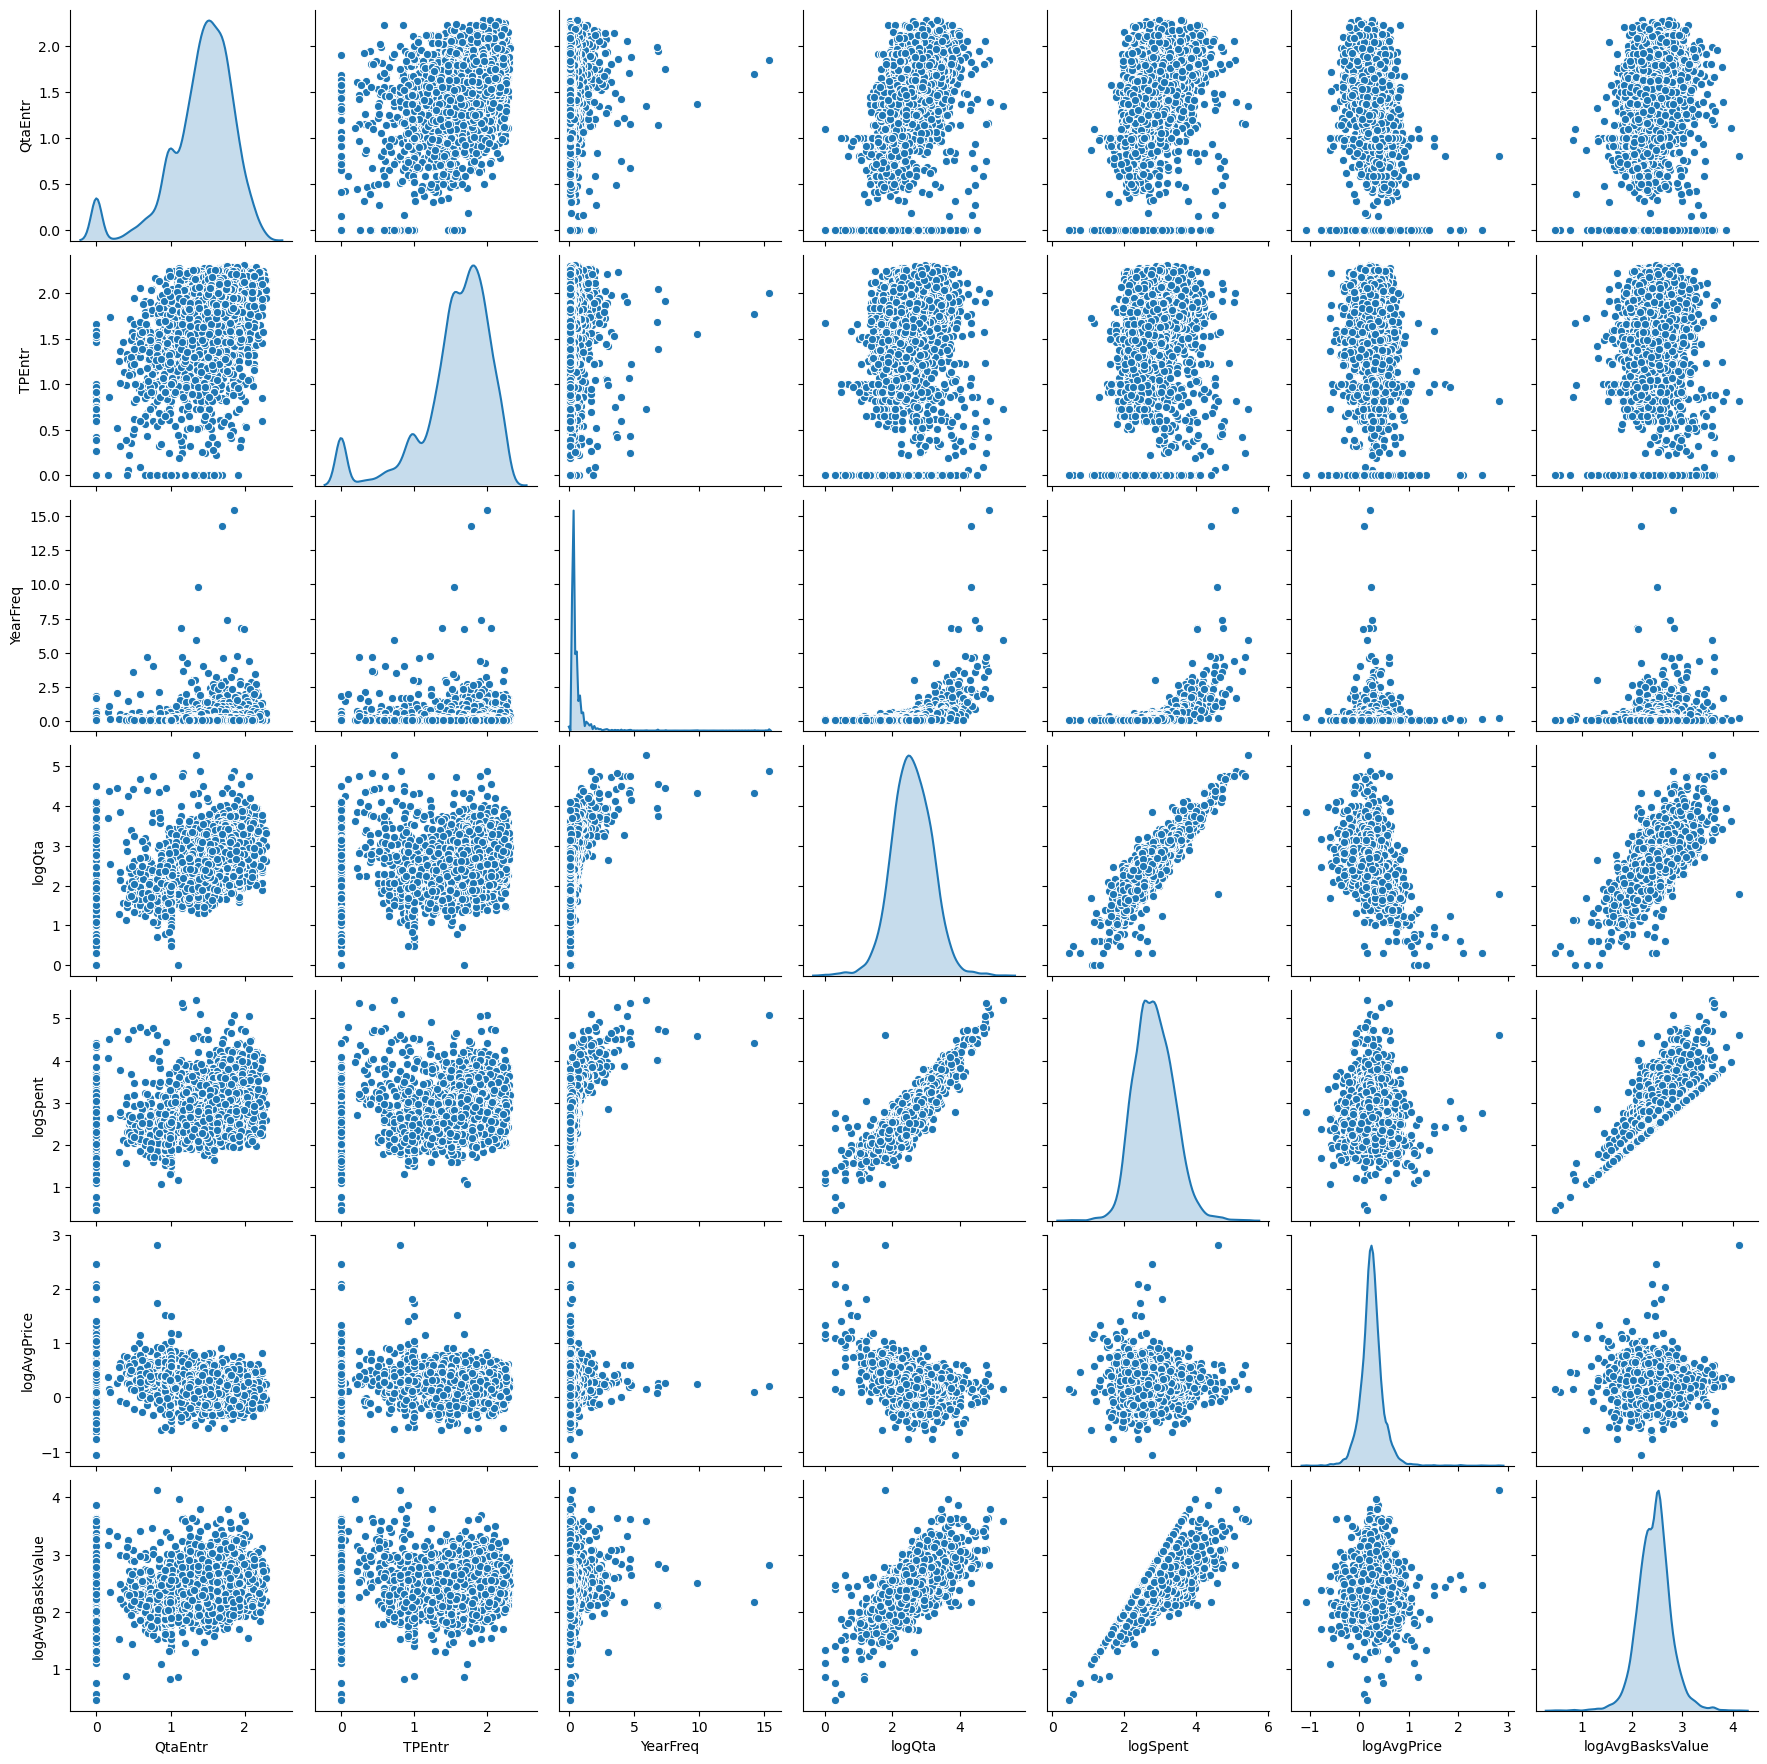

In [79]:
sns.pairplot(customers2.loc[:, 'QtaEntr':], diag_kind='kde')

# ==========================================================
# STOP QUA

# Get the data matrix and normalize

In [80]:
from sklearn.preprocessing import StandardScaler
columns = customers2.columns[1:]
X_data = customers2.iloc[:, 1:].to_numpy()
sc = StandardScaler()
X = sc.fit_transform(X_data)

# PCA

[]

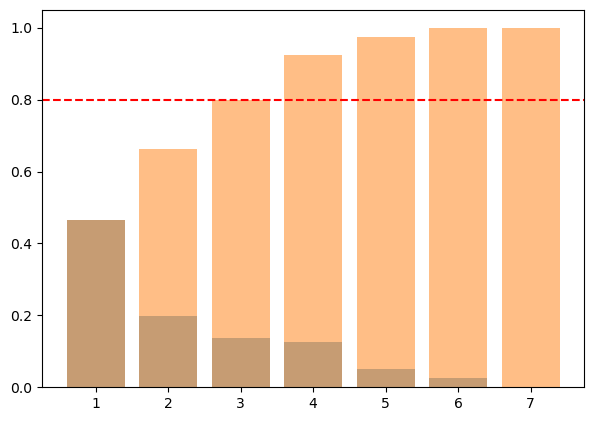

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X = pca.fit_transform(X)
cumsum = [0]
i = 0
for val in pca.explained_variance_ratio_:
    cumsum.append(cumsum[i]+val)
    i += 1
plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.bar(range(1, X.shape[1] + 1), cumsum[1:], alpha=0.5, align='center', label='Cumulative explained variance')
plt.axhline(0.8, color='red', linestyle='--')
plt.plot()

In [82]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# K-Means

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

it = 10
distorsions = []
sil_coef = []
for i in range(2, it):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    l = km.fit_predict(X)
    
    # distorsion
    distorsions.append(km.inertia_)
    
    # silhouette coefficient
    sil = silhouette_samples(X, l, metric='euclidean')
    sil_coef.append(np.mean(sil))
    
pdiff = []
for i in range(1, it-2):
    pdiff.append((distorsions[i-1] - distorsions[i])/distorsions[i-1])

* ### Distorsion

Text(0, 0.5, '% of difference')

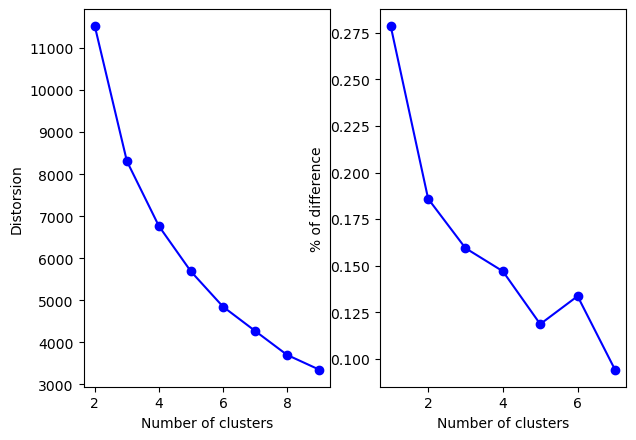

In [84]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(range(2, it), distorsions, marker='o', c='b')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Distorsion')

ax2.plot(range(1, it-2), pdiff, marker='o', c='b')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('% of difference')

* ### Silhouette score

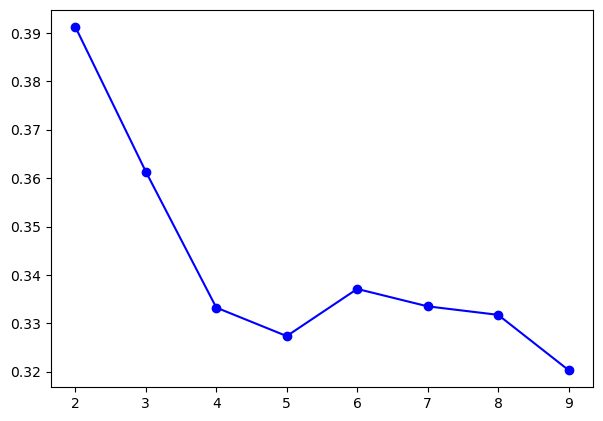

In [93]:
plt.plot(range(2, it), sil_coef, marker='o', c='b')

# Observation
From the plot above we can see that there is no a prominent elbow shape, in any case by plotting the difference of percentage of the SSE between two consecute value of K, it's possible to see that for K equal to four the  eccc...

### Set K = 3, execute clustering

In [86]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X)
customers2['KMeans_label'] = y_km

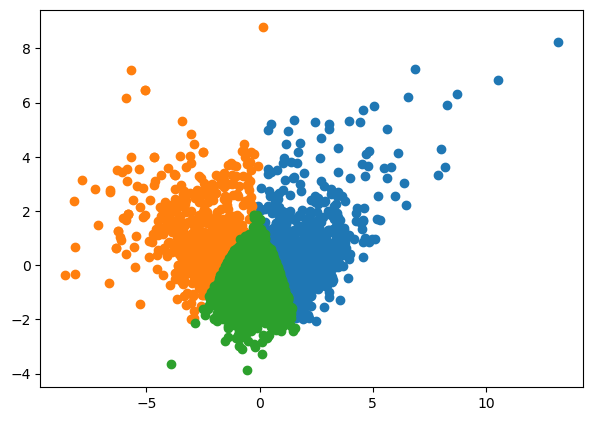

In [87]:
if X.shape[1] == 2:
    for i in np.unique(y_km):
        plt.scatter(X[y_km==i, 0], X[y_km==i, 1])
        plt.scatter

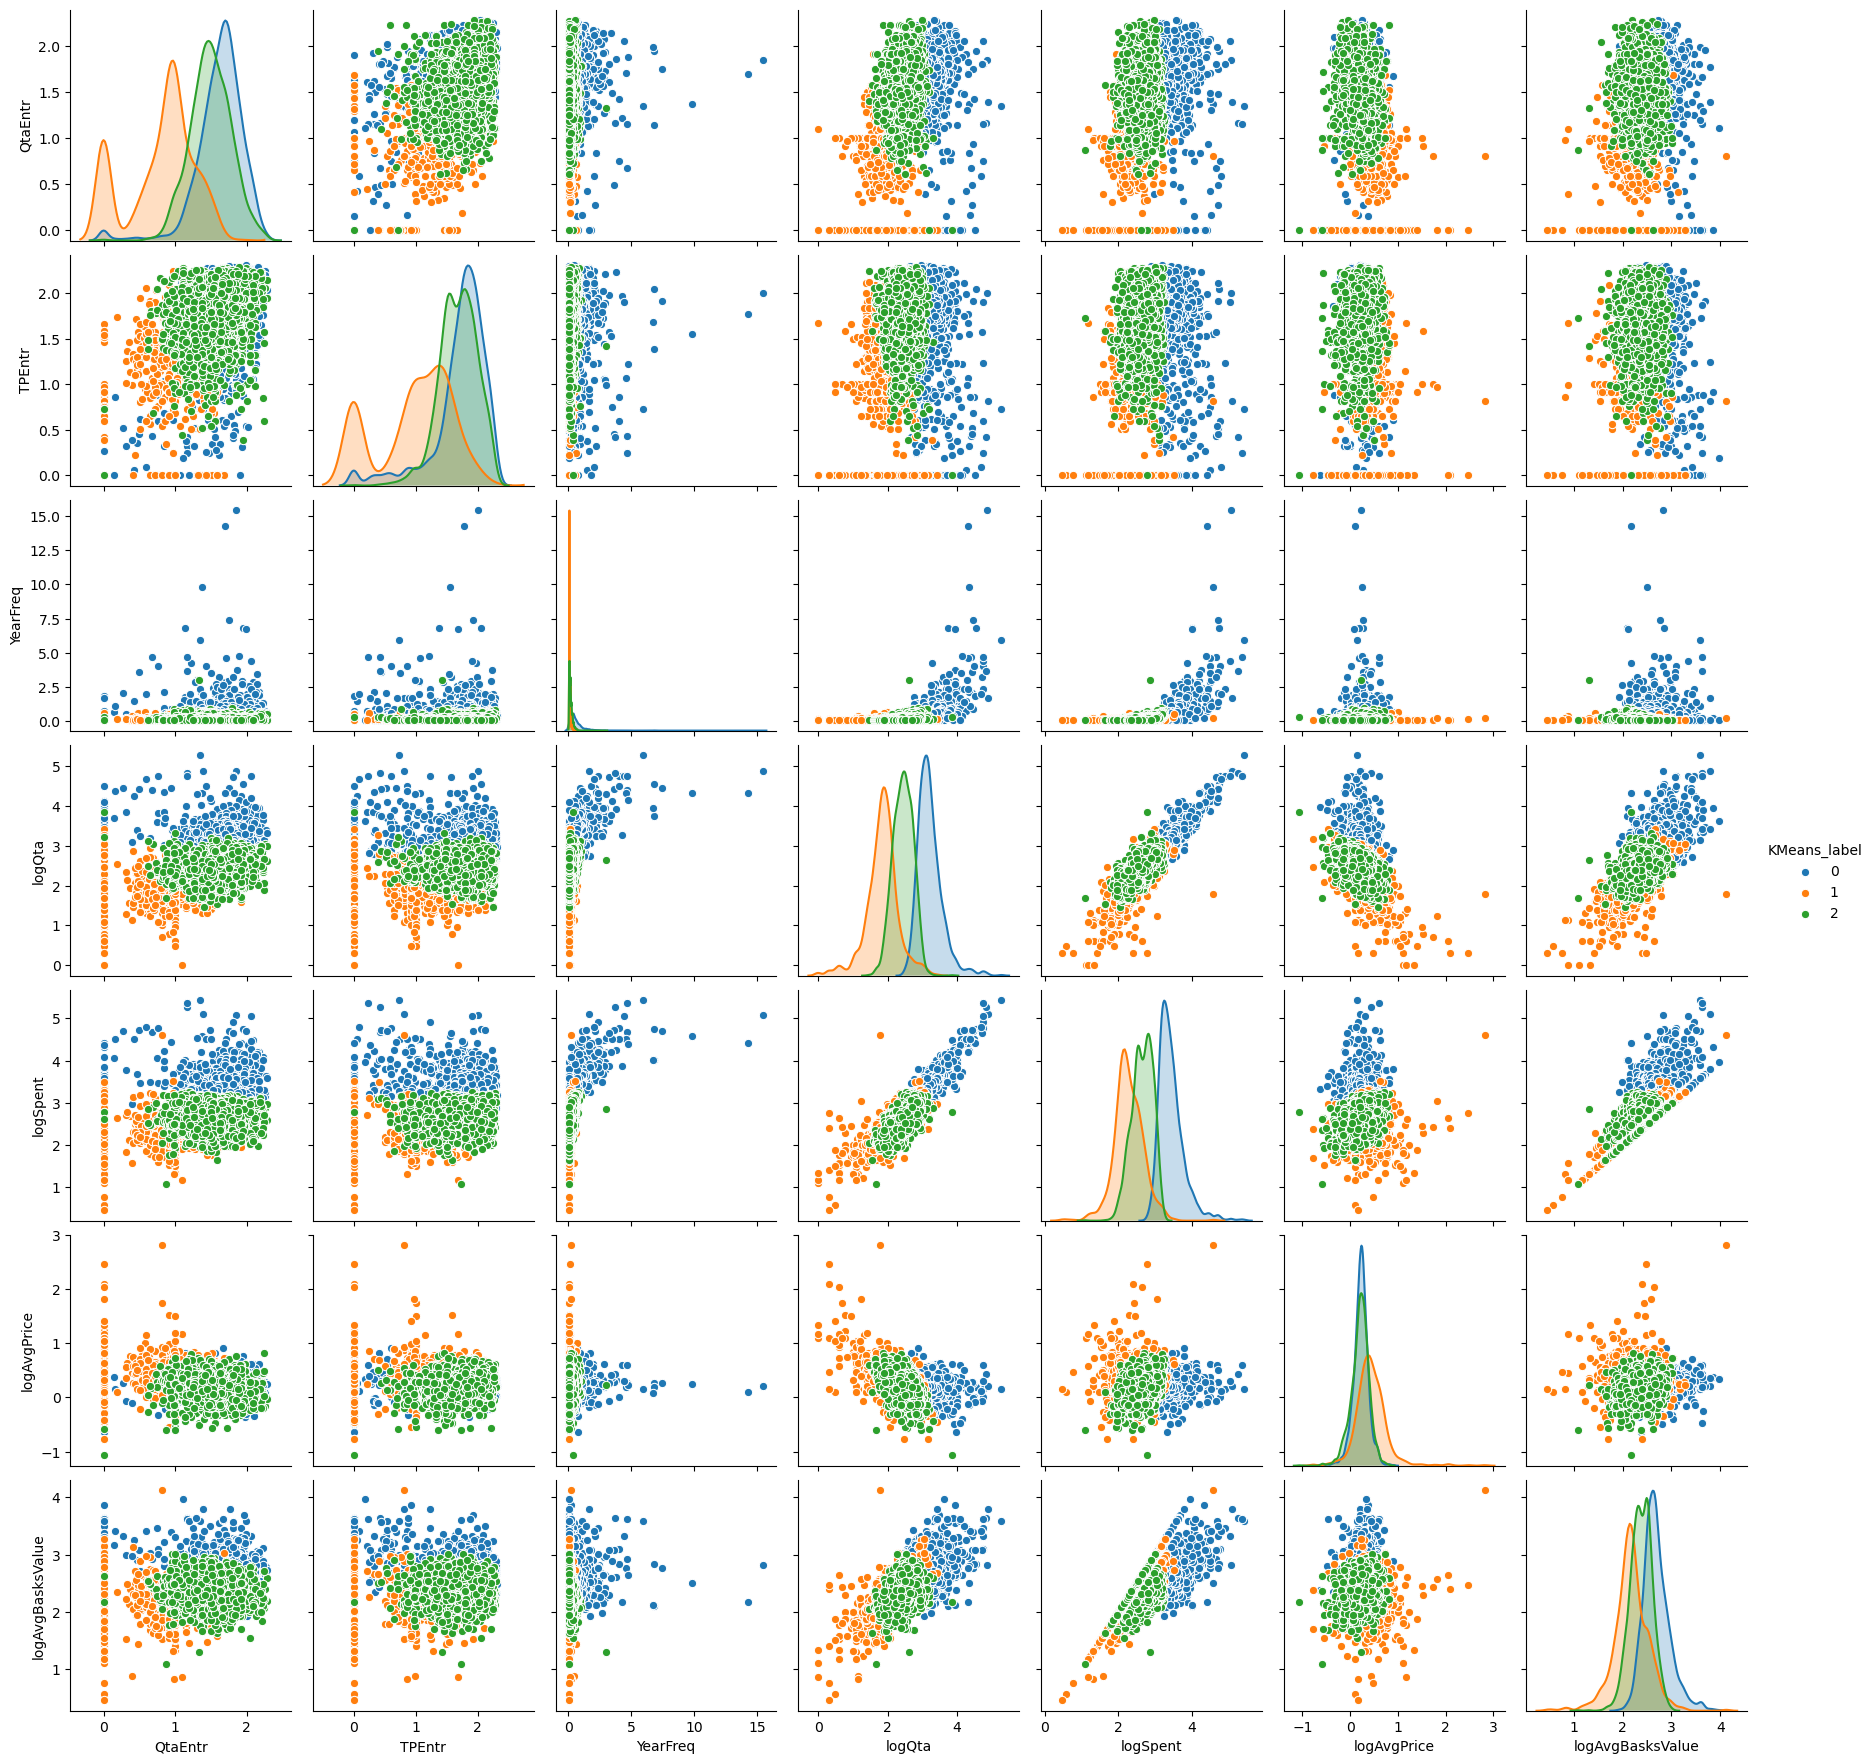

In [88]:
sns.pairplot(customers2, hue='KMeans_label', vars=columns)

# KMeans clustering validation

Number of clusters: 3
Number of point per cluster:
	Cluster 0 points 1312 (0.312)
	Cluster 1 points 757 (0.180)
	Cluster 2 points 2131 (0.507)


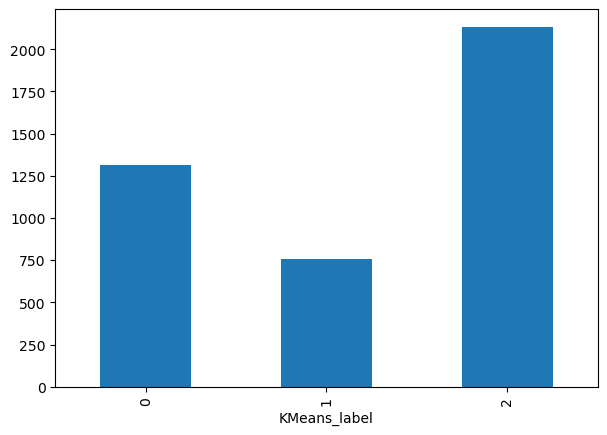

In [89]:
print('Number of clusters:', customers2['KMeans_label'].nunique())
print('Number of point per cluster:')
for i, data in customers2['KMeans_label'].groupby(customers2['KMeans_label']):
    perc = data.shape[0]/customers2.shape[0]
    print('\tCluster', i, 'points', data.shape[0], '(%.3f)' % perc)
customers2['KMeans_label'].groupby(customers2['KMeans_label']).count().plot(kind='bar')

* ### Compute and plot Silhouette score

Cluster 0 avg silhouette: 0.33260301952448945
Cluster 1 avg silhouette: 0.2611845351470453
Cluster 2 avg silhouette: 0.4146082177307212
Total avg silhouette: 0.36133856350157395


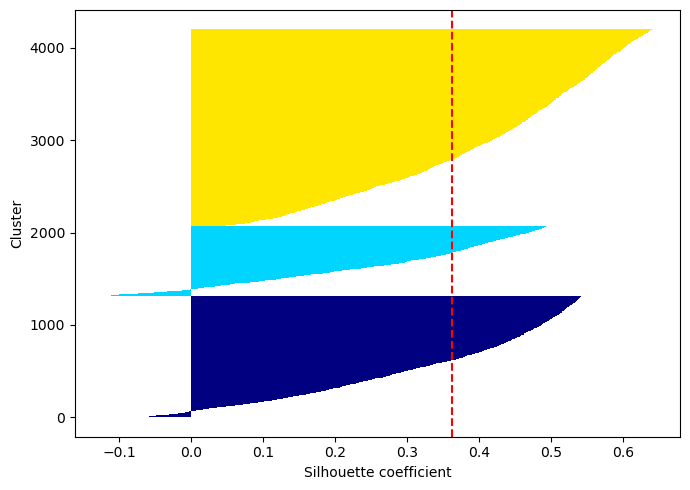

In [90]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km) # Get cluster labels
n_clusters = cluster_labels.shape[0] # Get number of clusters
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') # Get the silhouette values

y_ax_lower, y_ax_upper = 0, 0
y_tick = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    
    print('Cluster', c, 'avg silhouette:', np.mean(c_silhouette_vals))
    
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_tick.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
print('Total avg silhouette:', silhouette_avg)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks=(y_tick, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

* ### Cluster validity via similarity matrix

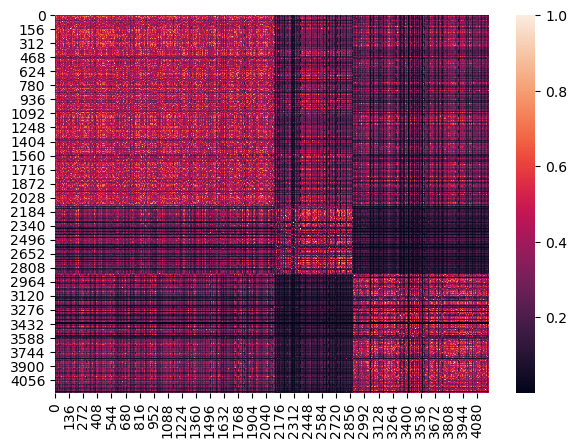

In [91]:
from sklearn.metrics.pairwise import euclidean_distances
customers2.sort_values(by='KMeans_label', ascending=False, inplace=True)
dist = euclidean_distances(customers2.loc[:, columns], customers2.loc[:, columns])
sim = np.exp(-dist)
sns.heatmap(sim)

# Look at the dataset

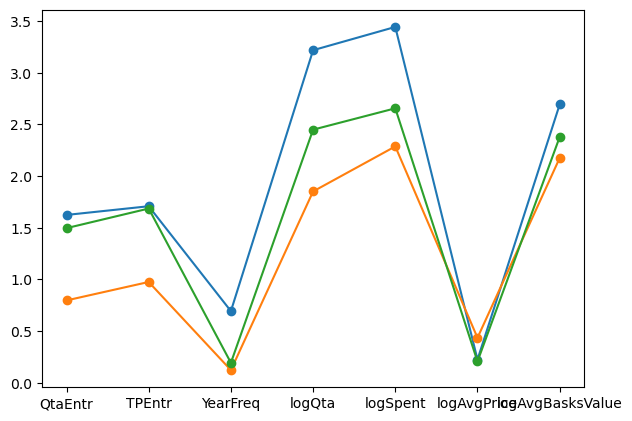

In [92]:
means = []
std = []

for i in np.unique(y_km):
    clust = customers2.loc[customers2['KMeans_label'] == i, columns]
    means.append(clust.describe().loc['mean'].values)
    std.append(clust.describe().loc['std'].values)
    
for i in np.unique(y_km):
    plt.plot(range(0, columns.shape[0]), means[i], marker='o')

plt.xticks(range(0, columns.shape[0]), columns)
plt.show()

# Hierarchical clustering

In [95]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Ricorda! X è il risultato della PCA sul dataset originale.
dist = pdist(X, metric='euclidean') # Compute condensed distance matrix (a vector)

* ### Complete link clustering

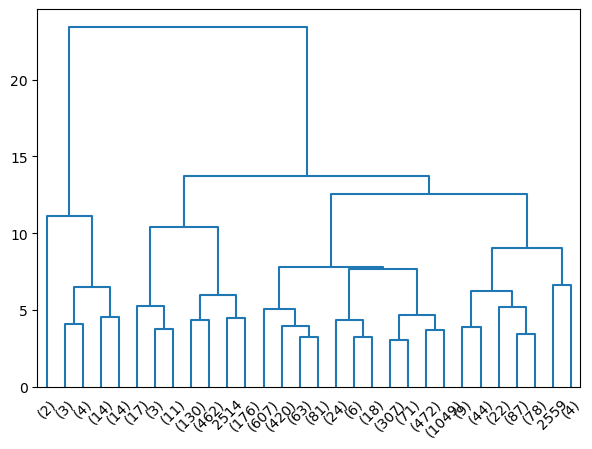

In [115]:
data_link_compl = linkage(dist, method='complete', metric='euclidean') 
df_compl = pd.DataFrame(data_link_compl, columns=['row label1', 'row label2', 'distance', 'no. of item in clust'], index=['cluster %d' %(i+1) for i in range(data_link.shape[0])])
res_compl = dendrogram(data_link_compl, color_threshold=1.0, truncate_mode='lastp')

* ### Single link clustering

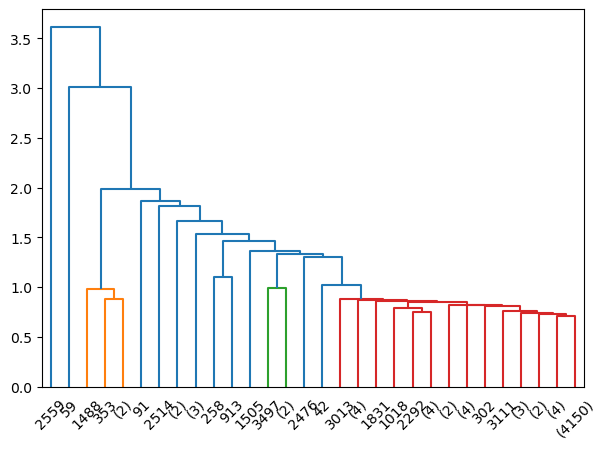

In [116]:
data_link_singl = linkage(dist, method='single', metric='euclidean') 
df_singl = pd.DataFrame(data_link_singl, columns=['row label1', 'row label2', 'distance', 'no. of item in clust'], index=['cluster %d' %(i+1) for i in range(data_link.shape[0])])
res_singl = dendrogram(data_link_singl, color_threshold=1.0, truncate_mode='lastp')

* ### Ward clustering

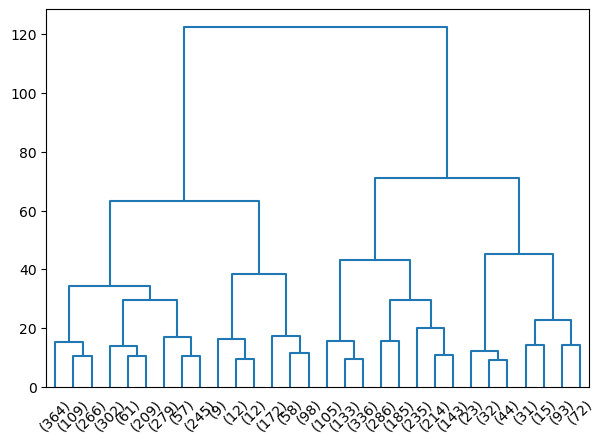

In [117]:
data_link_ward = linkage(dist, method='ward', metric='euclidean') 
df_ward = pd.DataFrame(data_link_ward, columns=['row label1', 'row label2', 'distance', 'no. of item in clust'], index=['cluster %d' %(i+1) for i in range(data_link.shape[0])])
res_ward = dendrogram(data_link_ward, color_threshold=1.0, truncate_mode='lastp')

* ### Centroid clustering

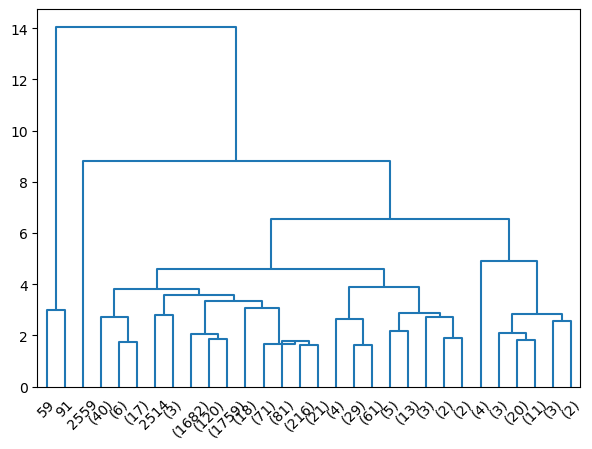

In [118]:
data_link_centr = linkage(dist, method='centroid', metric='euclidean') 
df_centr = pd.DataFrame(data_link_centr, columns=['row label1', 'row label2', 'distance', 'no. of item in clust'], index=['cluster %d' %(i+1) for i in range(data_link.shape[0])])
res_centr = dendrogram(data_link_centr, color_threshold=1.0, truncate_mode='lastp')

# CPCC

In [124]:
from scipy.cluster.hierarchy import cophenet
cpcc = pd.DataFrame({'Technique': ['Single Link', 
                                   'Complete Link', 
                                   'Ward', 
                                   'Centroid'], 
                     'CPCC': [cophenet(data_link_singl, dist)[0], 
                              cophenet(data_link_compl, dist)[0],
                              cophenet(data_link_ward, dist)[0],
                              cophenet(data_link_centr, dist)[0]]})
cpcc

Technique      CPCC
0    Single Link  0.682678
1  Complete Link  0.571096
2           Ward  0.473515
3       Centroid  0.773392

# DBSCAN

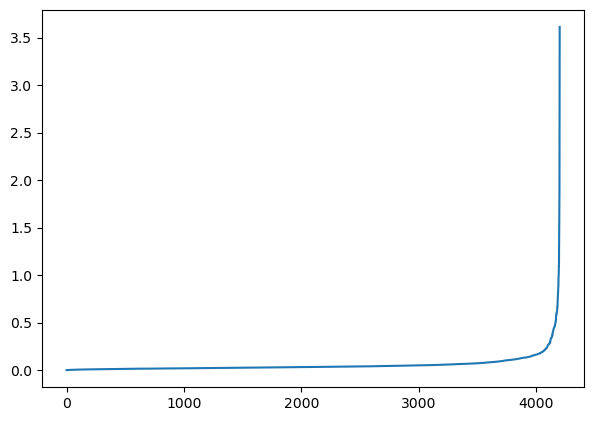

In [125]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [136]:
eps = 0.15
min_samples = 10
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
y_db = db.fit_predict(X)
customers2['DB_label'] = y_db

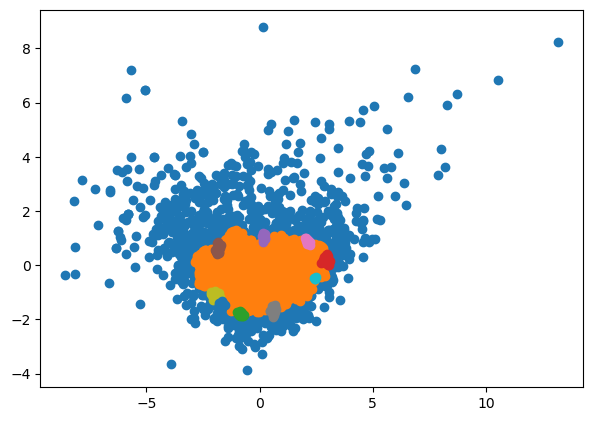

In [137]:
if X.shape[1] == 2:
    for i in np.unique(y_db):
        plt.scatter(X[y_db==i, 0], X[y_db==i, 1])
        plt.scatter

In [ ]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(data_link, orientation='left')

df_rowclust = pd.DataFrame(X).iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()